In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
NX = 11
NY = 11
NL = 8

if NL == 8:
    idxs_dir = [0, 4, 1, 5, 2, 6, 3, 7]
    cxs = [1, 0, -1,  0, 1, -1, -1,  1]
    cys = [0, 1,  0, -1, 1,  1, -1, -1]
elif NL == 16:
    idxs_dir = [0, 8, 4, 9, 1, 10, 5, 11, 2, 12, 6, 13, 3, 14, 7, 15]
    cxs = [1, 0, -1,  0, 1, -1, -1,  1, 2, 1, -1, -2, -2, -1, -1,  2]
    cys = [0, 1,  0, -1, 1,  1, -1, -1, 1, 2,  2,  1, -1, -2, -2, -1]

In [10]:
def stream_roll(xi):
    xf = np.array(xi, copy=True)

    for dir_i, i_dir in enumerate(idxs_dir):
        cy = cys[i_dir]
        cx = cxs[i_dir]
        
        xf[:, :, i_dir] = np.roll(xf[:, :, i_dir], cx, axis=1)
        xf[:, :, i_dir] = np.roll(xf[:, :, i_dir], cy, axis=0)
    
    return xf

def stream_custom(xi):
    xf = np.array(xi, copy=True)
    # xf = np.zeros_like(xi)

    # xf[:NY-1, :, 0] = xi[1:NY, :, 0] # up
    # xf[1:NY, :, 1] = xi[:NY-1, :, 1] # down
    # xf[:, :NX-1, 2] = xi[:, 1:NX, 2] # left
    # xf[:, 1:NX, 3] = xi[:, :NX-1, 3] # right

    for dir_i, i_dir in enumerate(idxs_dir):
        nl = i_dir
        cy = cys[i_dir]
        cx = cxs[i_dir]

        for j in range(NY):
            for i in range(NX):
                l_src = xi[j, i, nl]

                l_stream = l_src
                if True:
                    l_stream = l_src * (cx**2 + cy**2)**0.5
                    xf[j, i, nl] += l_src - l_stream

                # print(f"xf[{(j + cy) % NY}, {(i + cx) % NX}, {nl}] += {l_src}")
                xf[(j + cy) % NY, (i + cx) % NX, nl] = l_src

                # xi[j, i, nl] -= l_src

    return xf

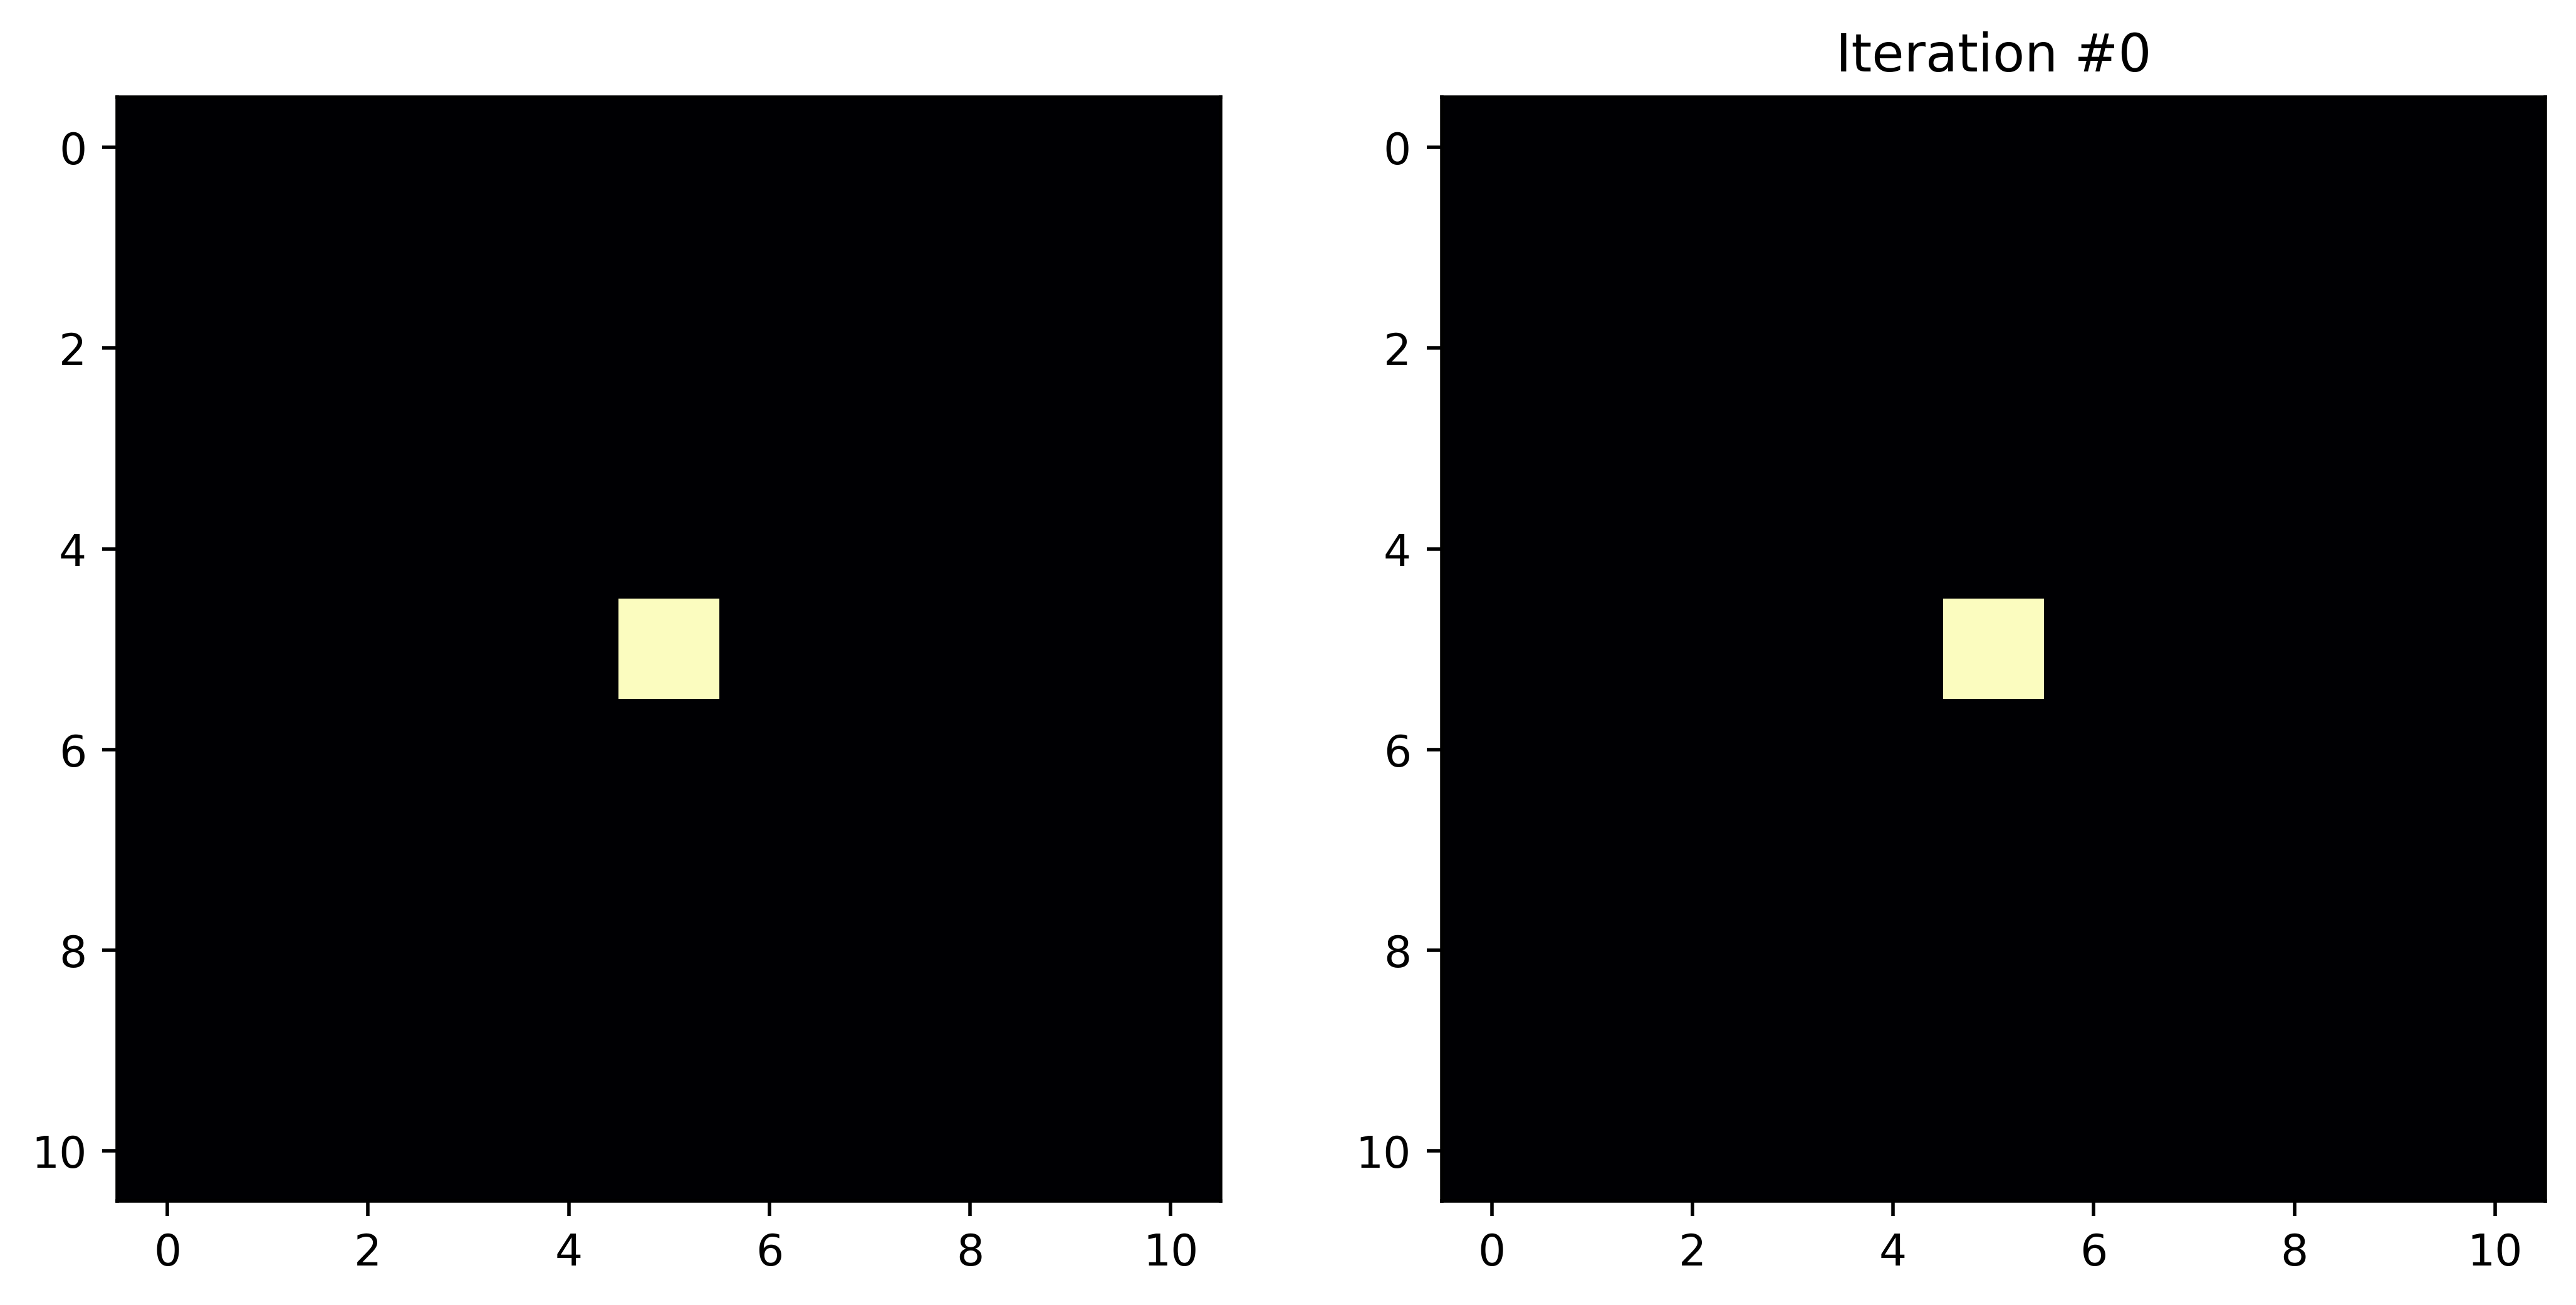

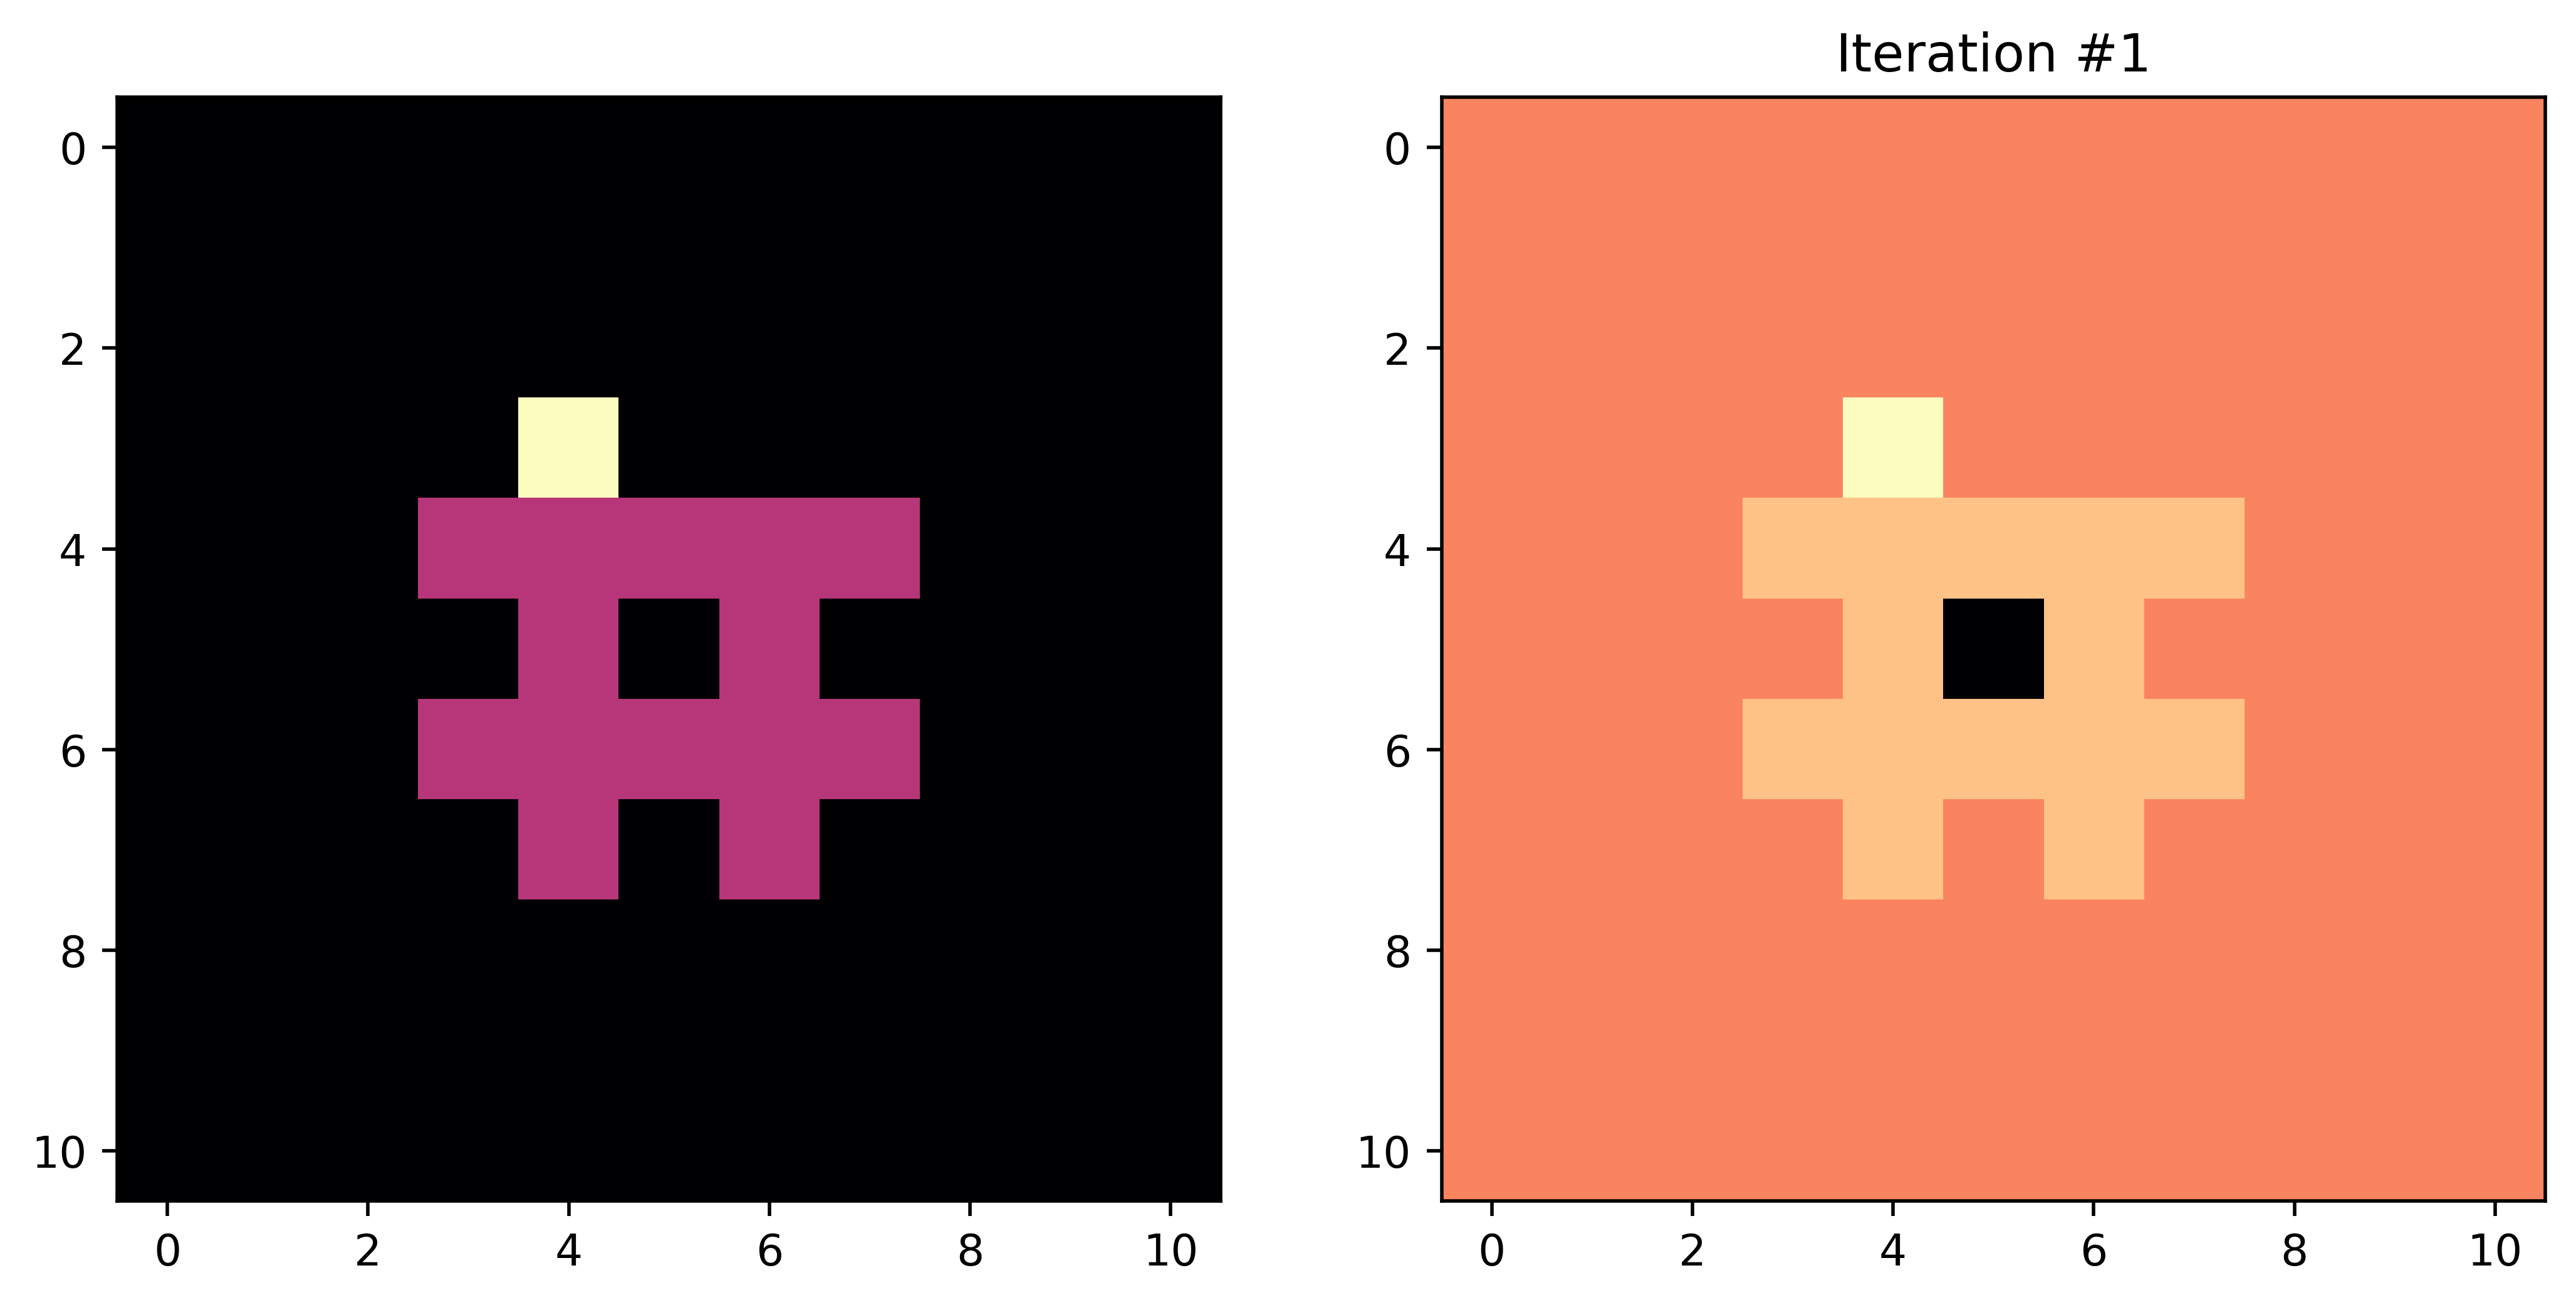

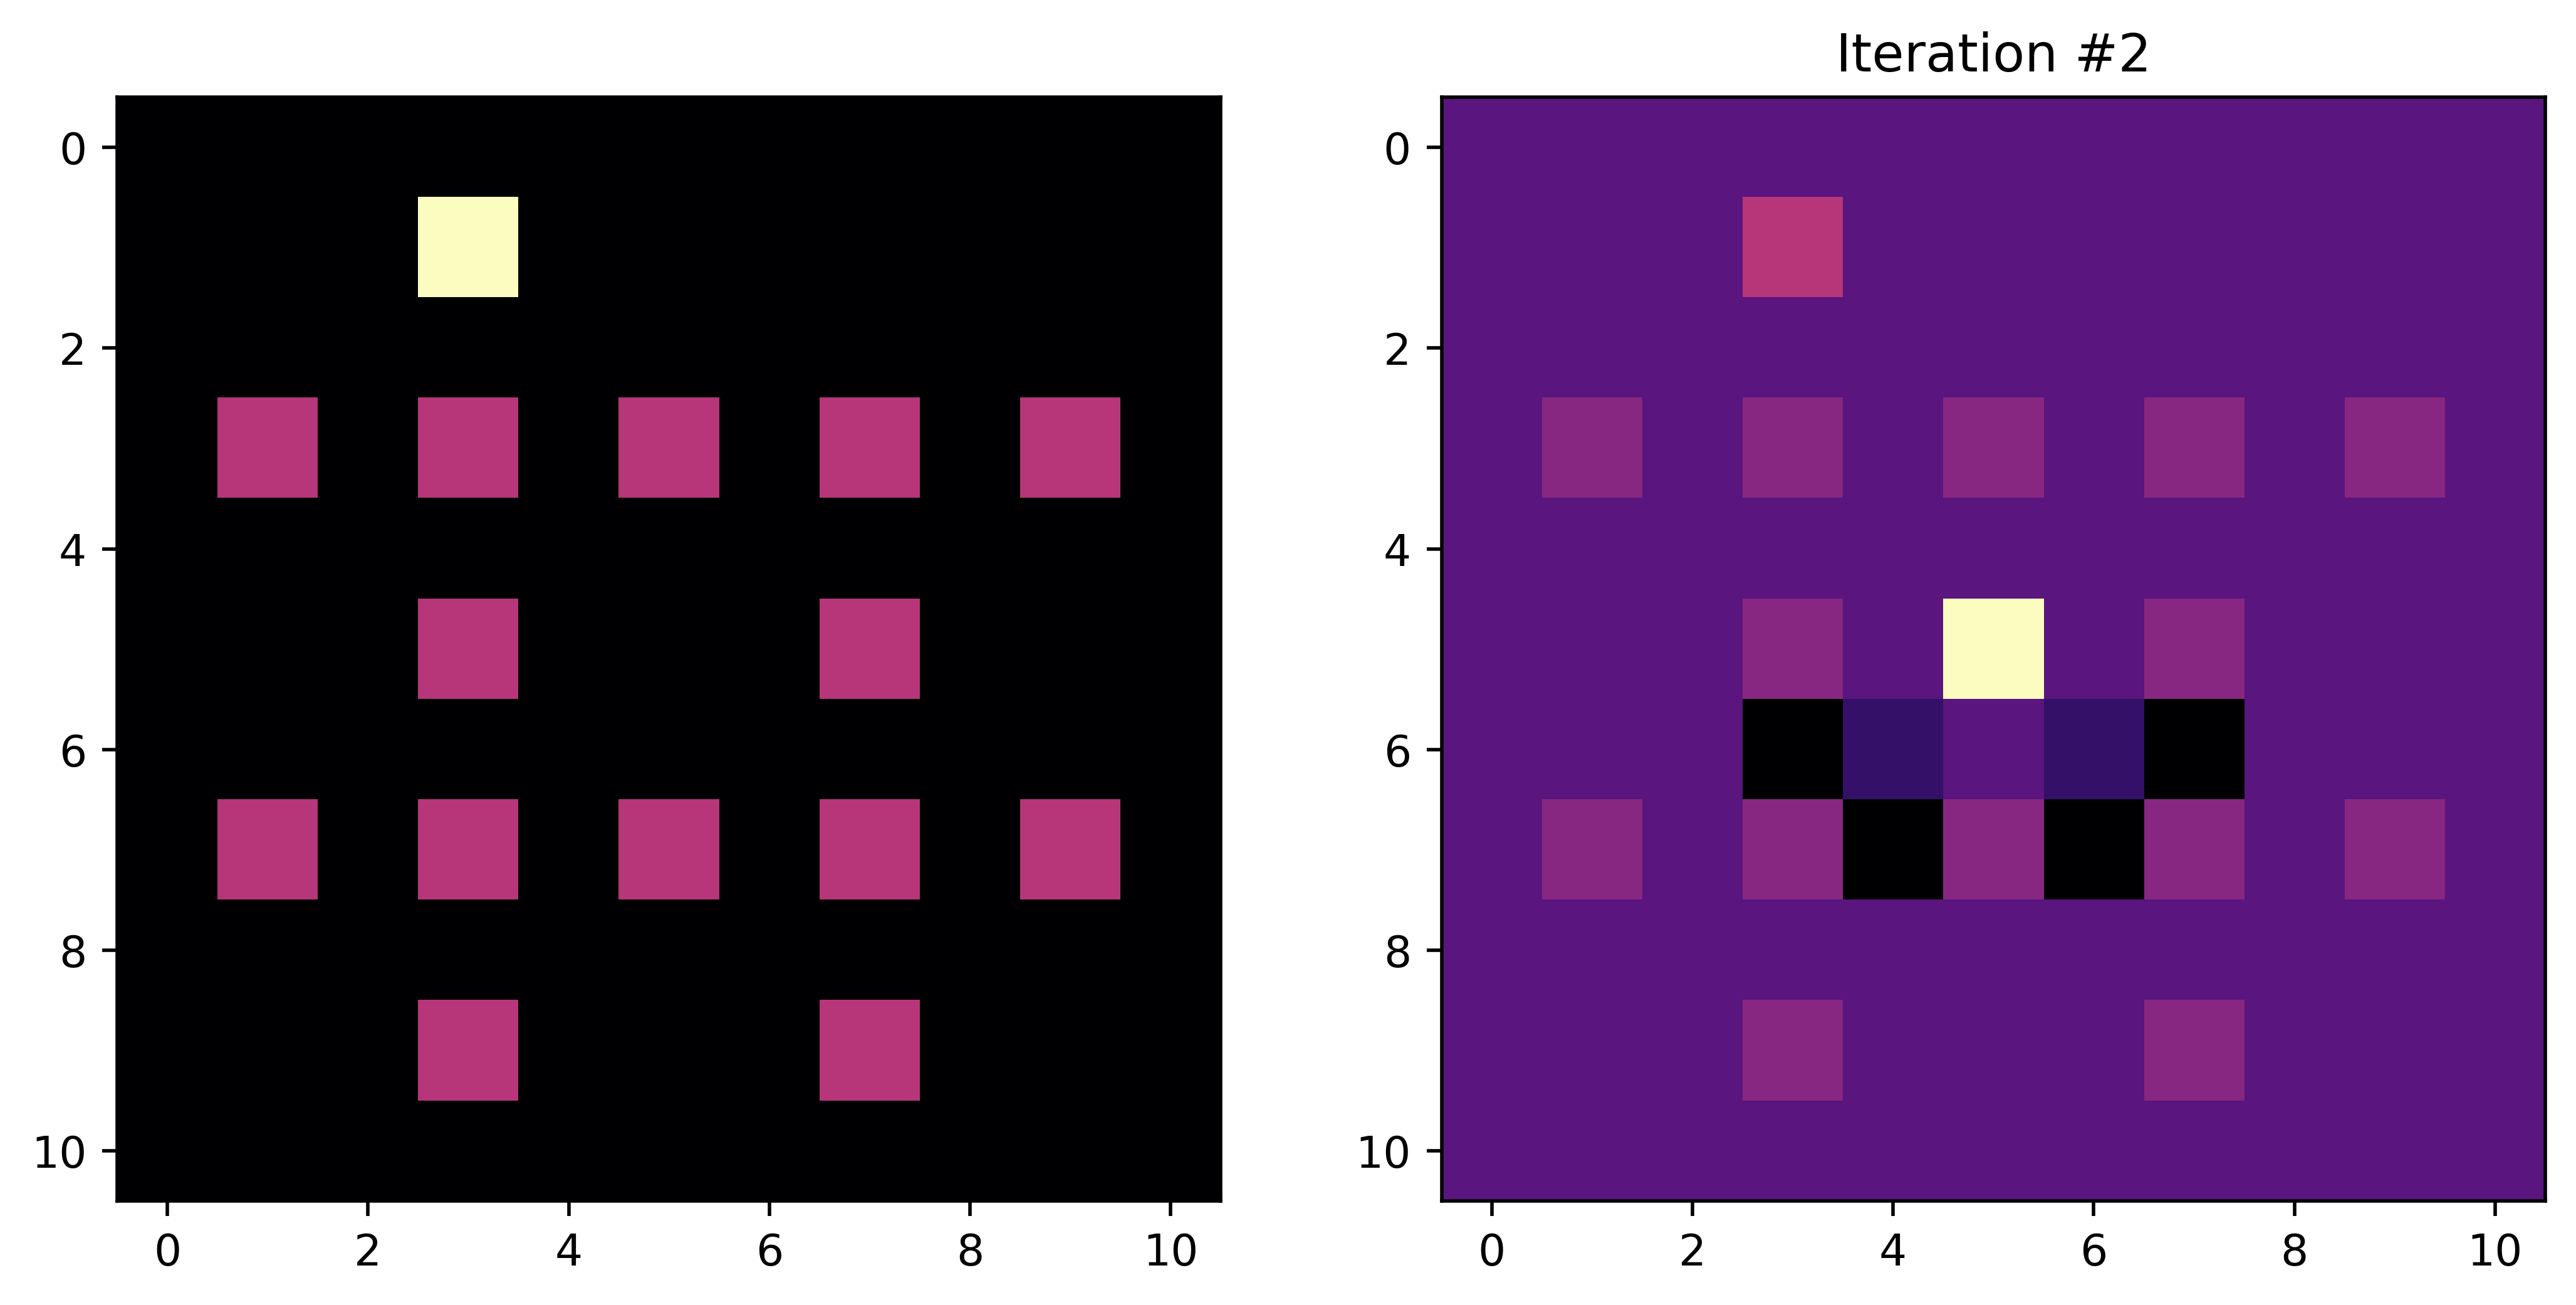

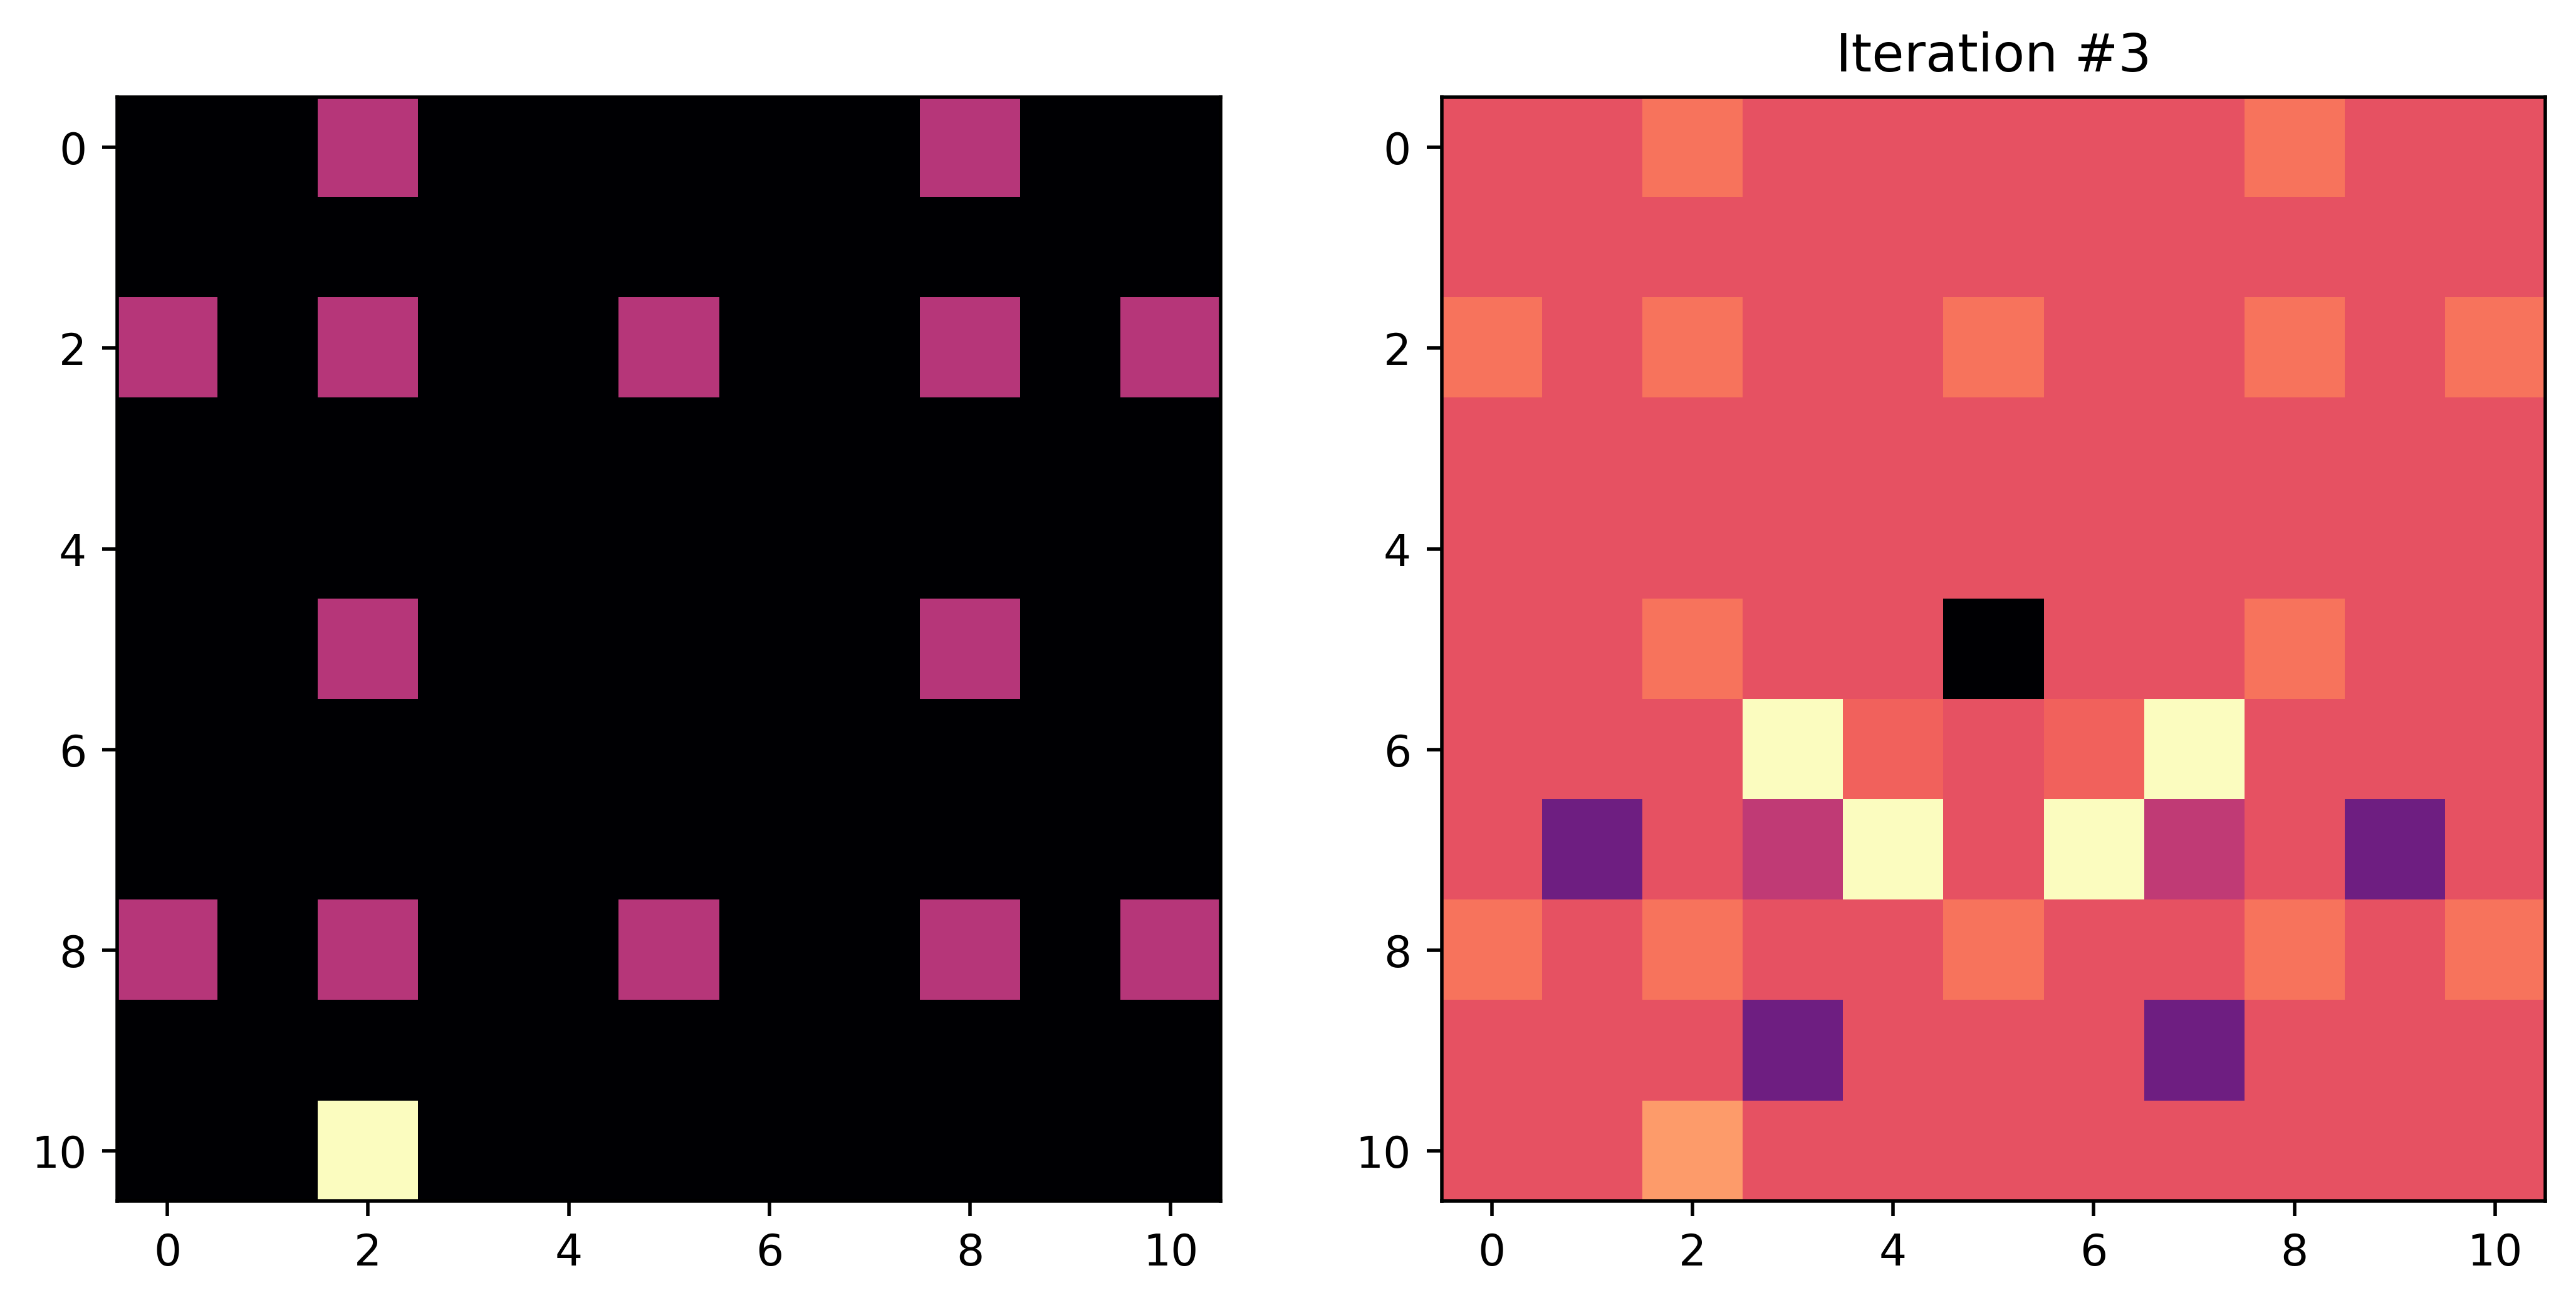

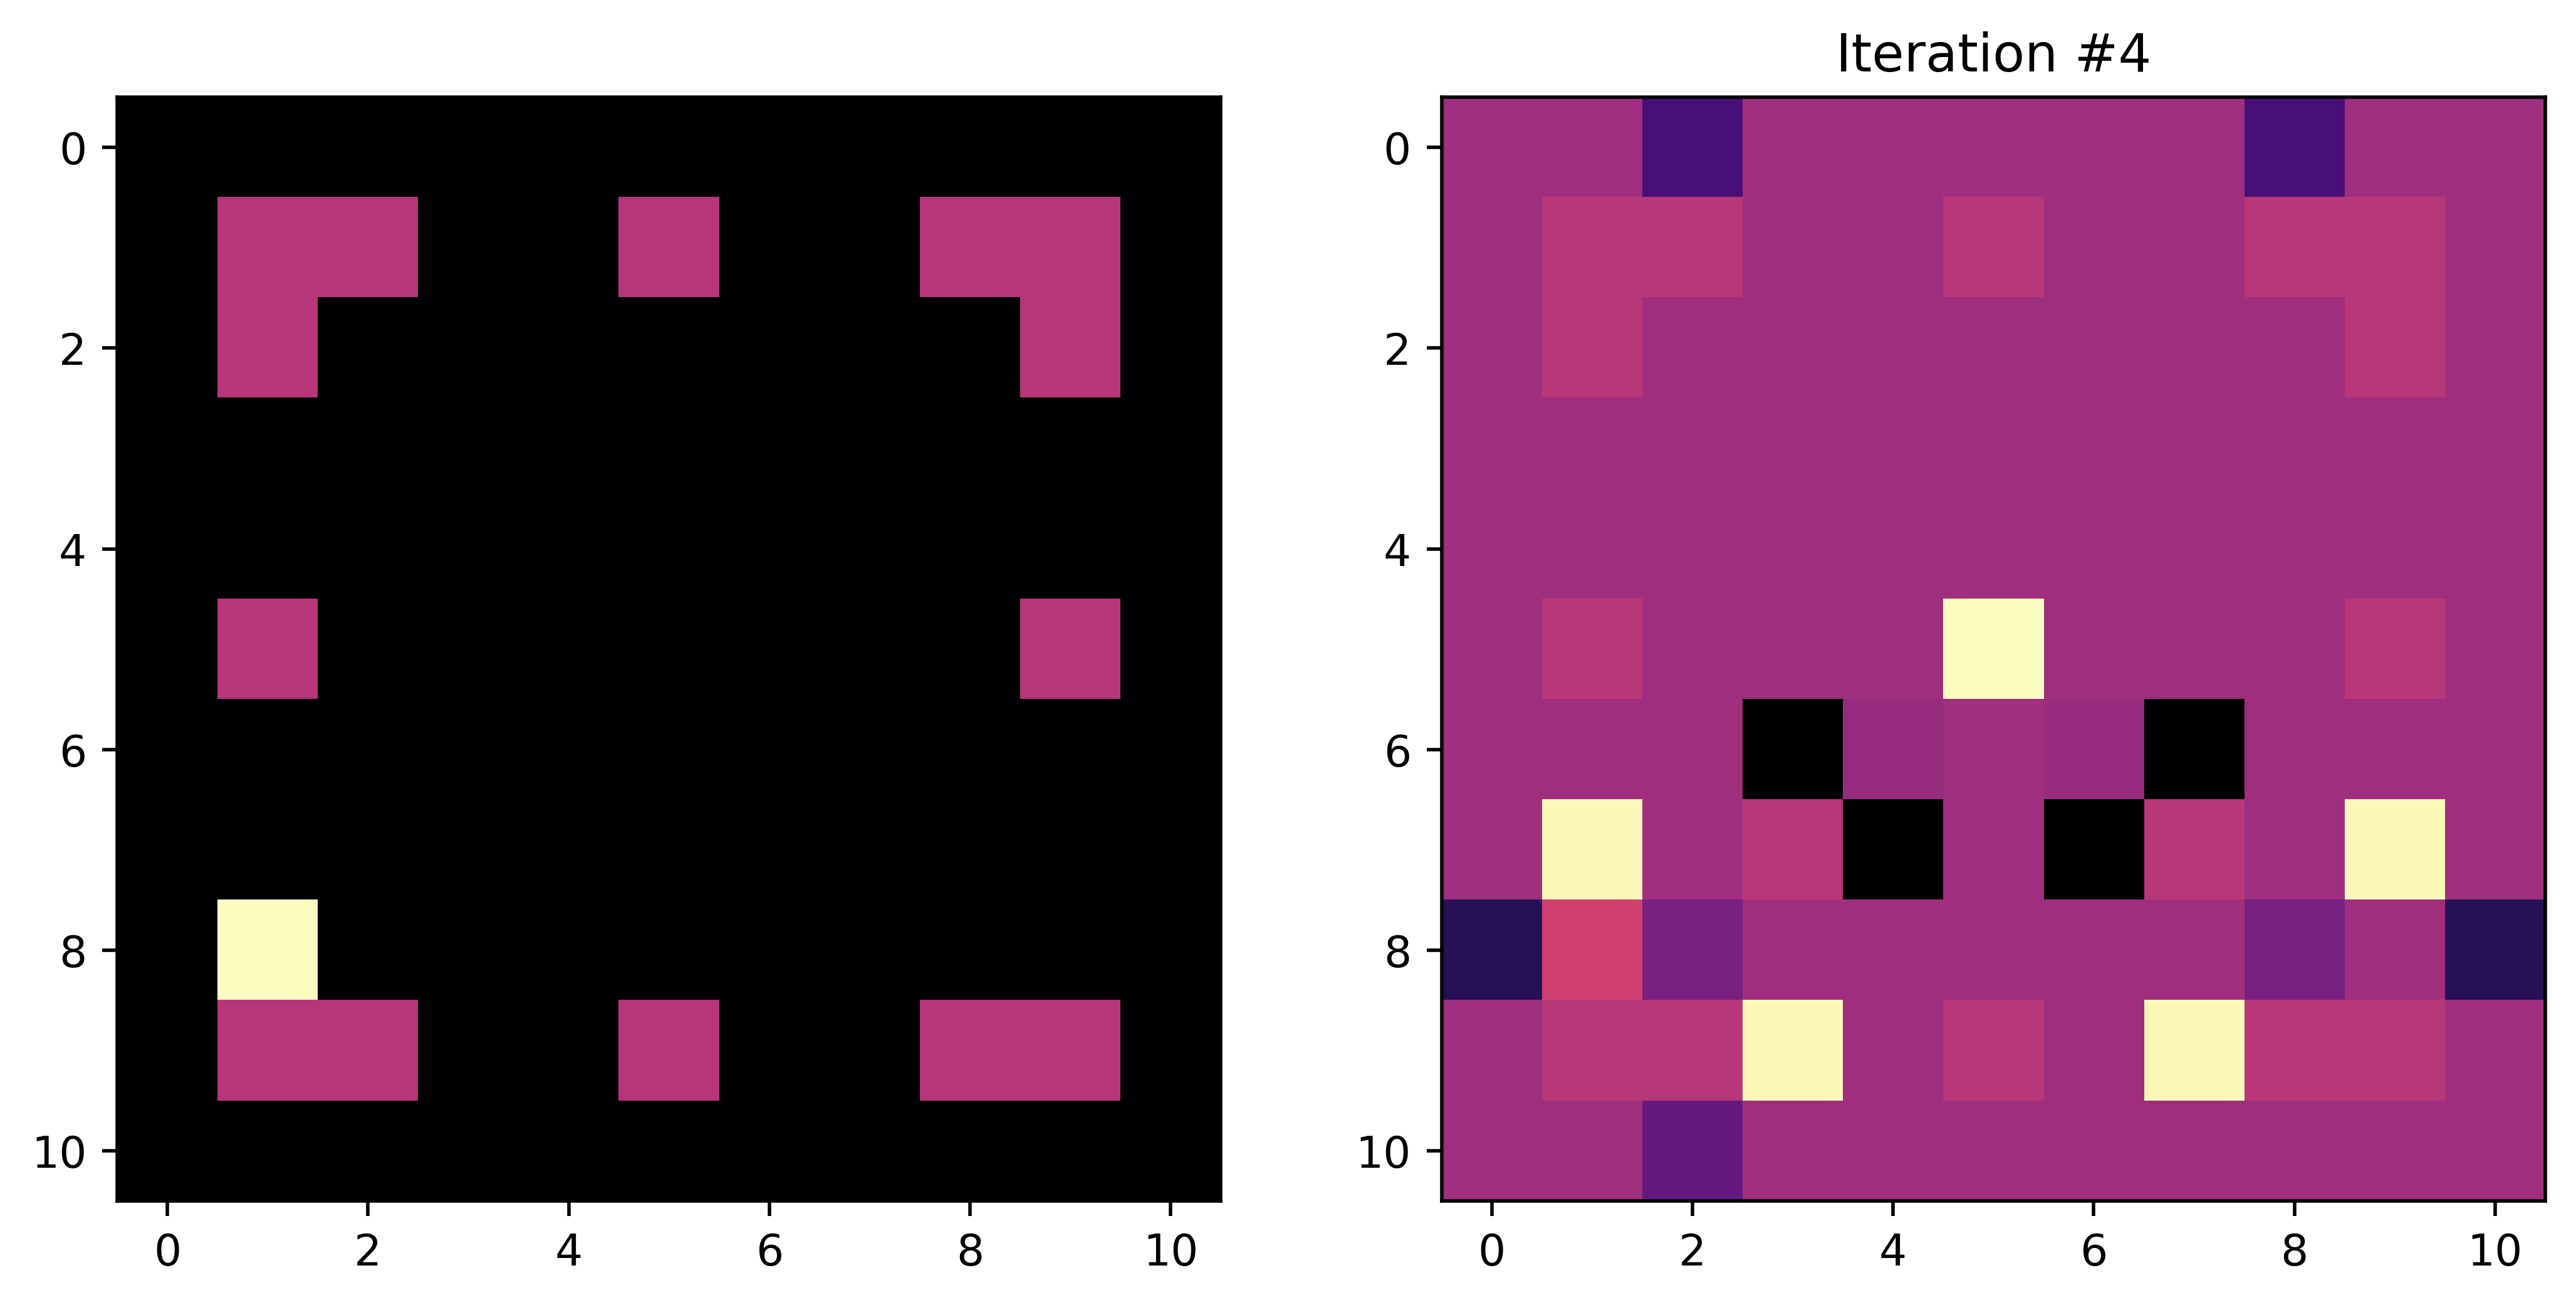

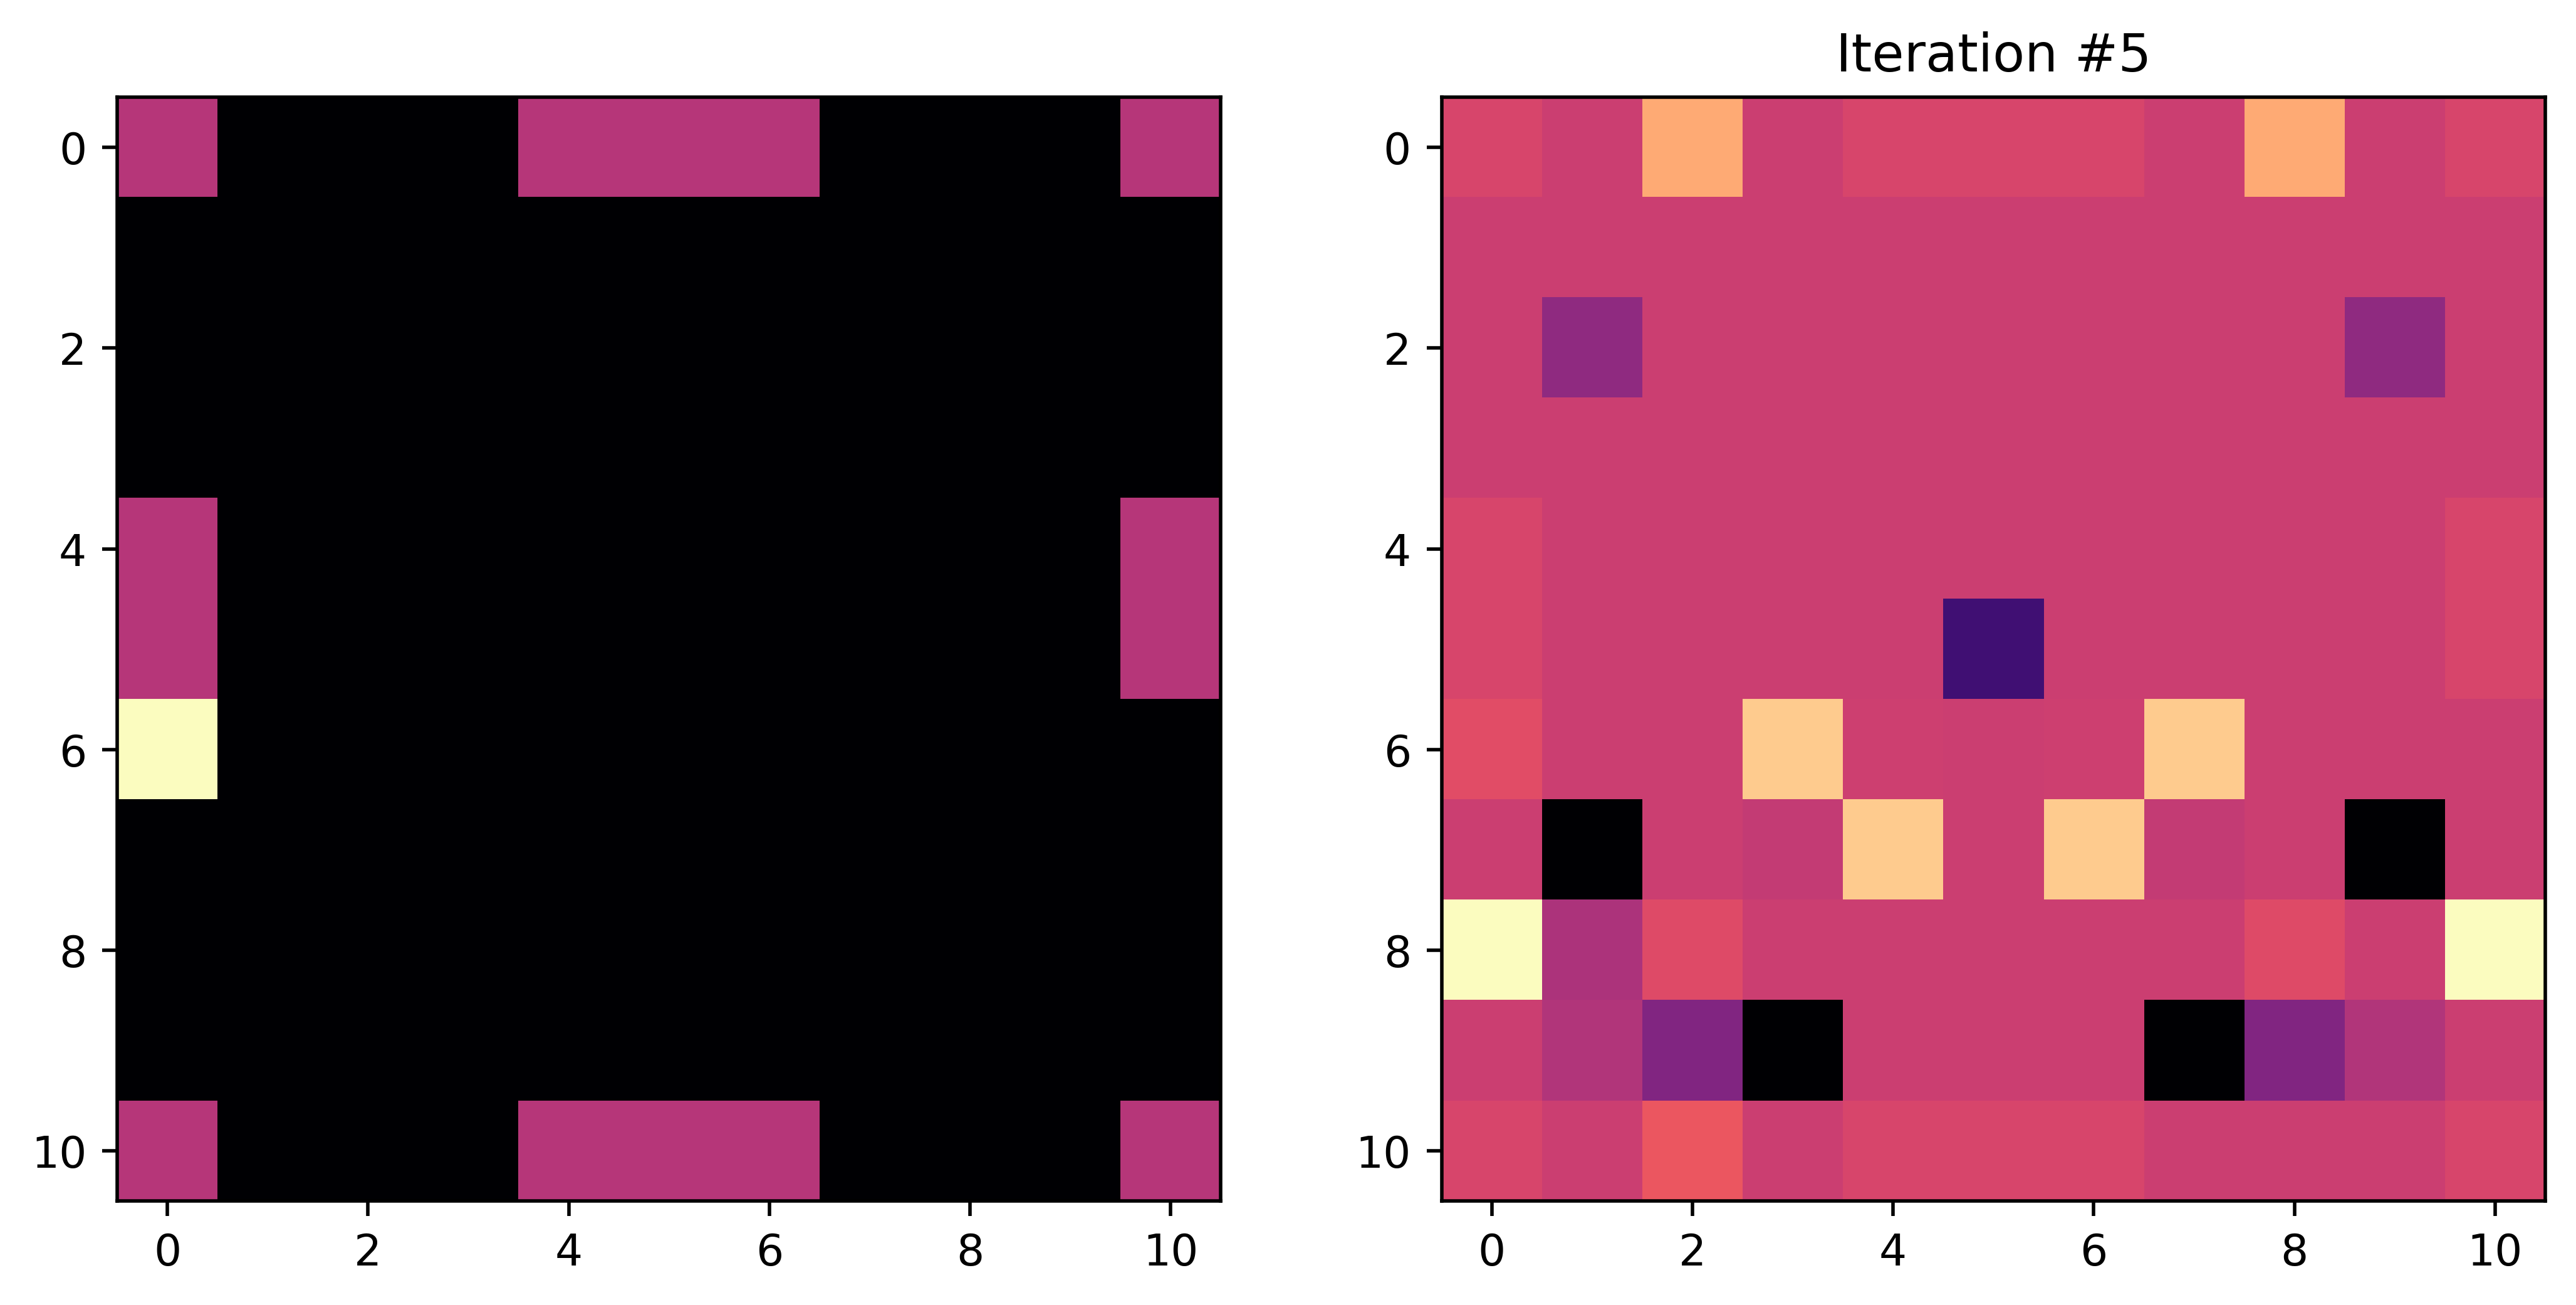

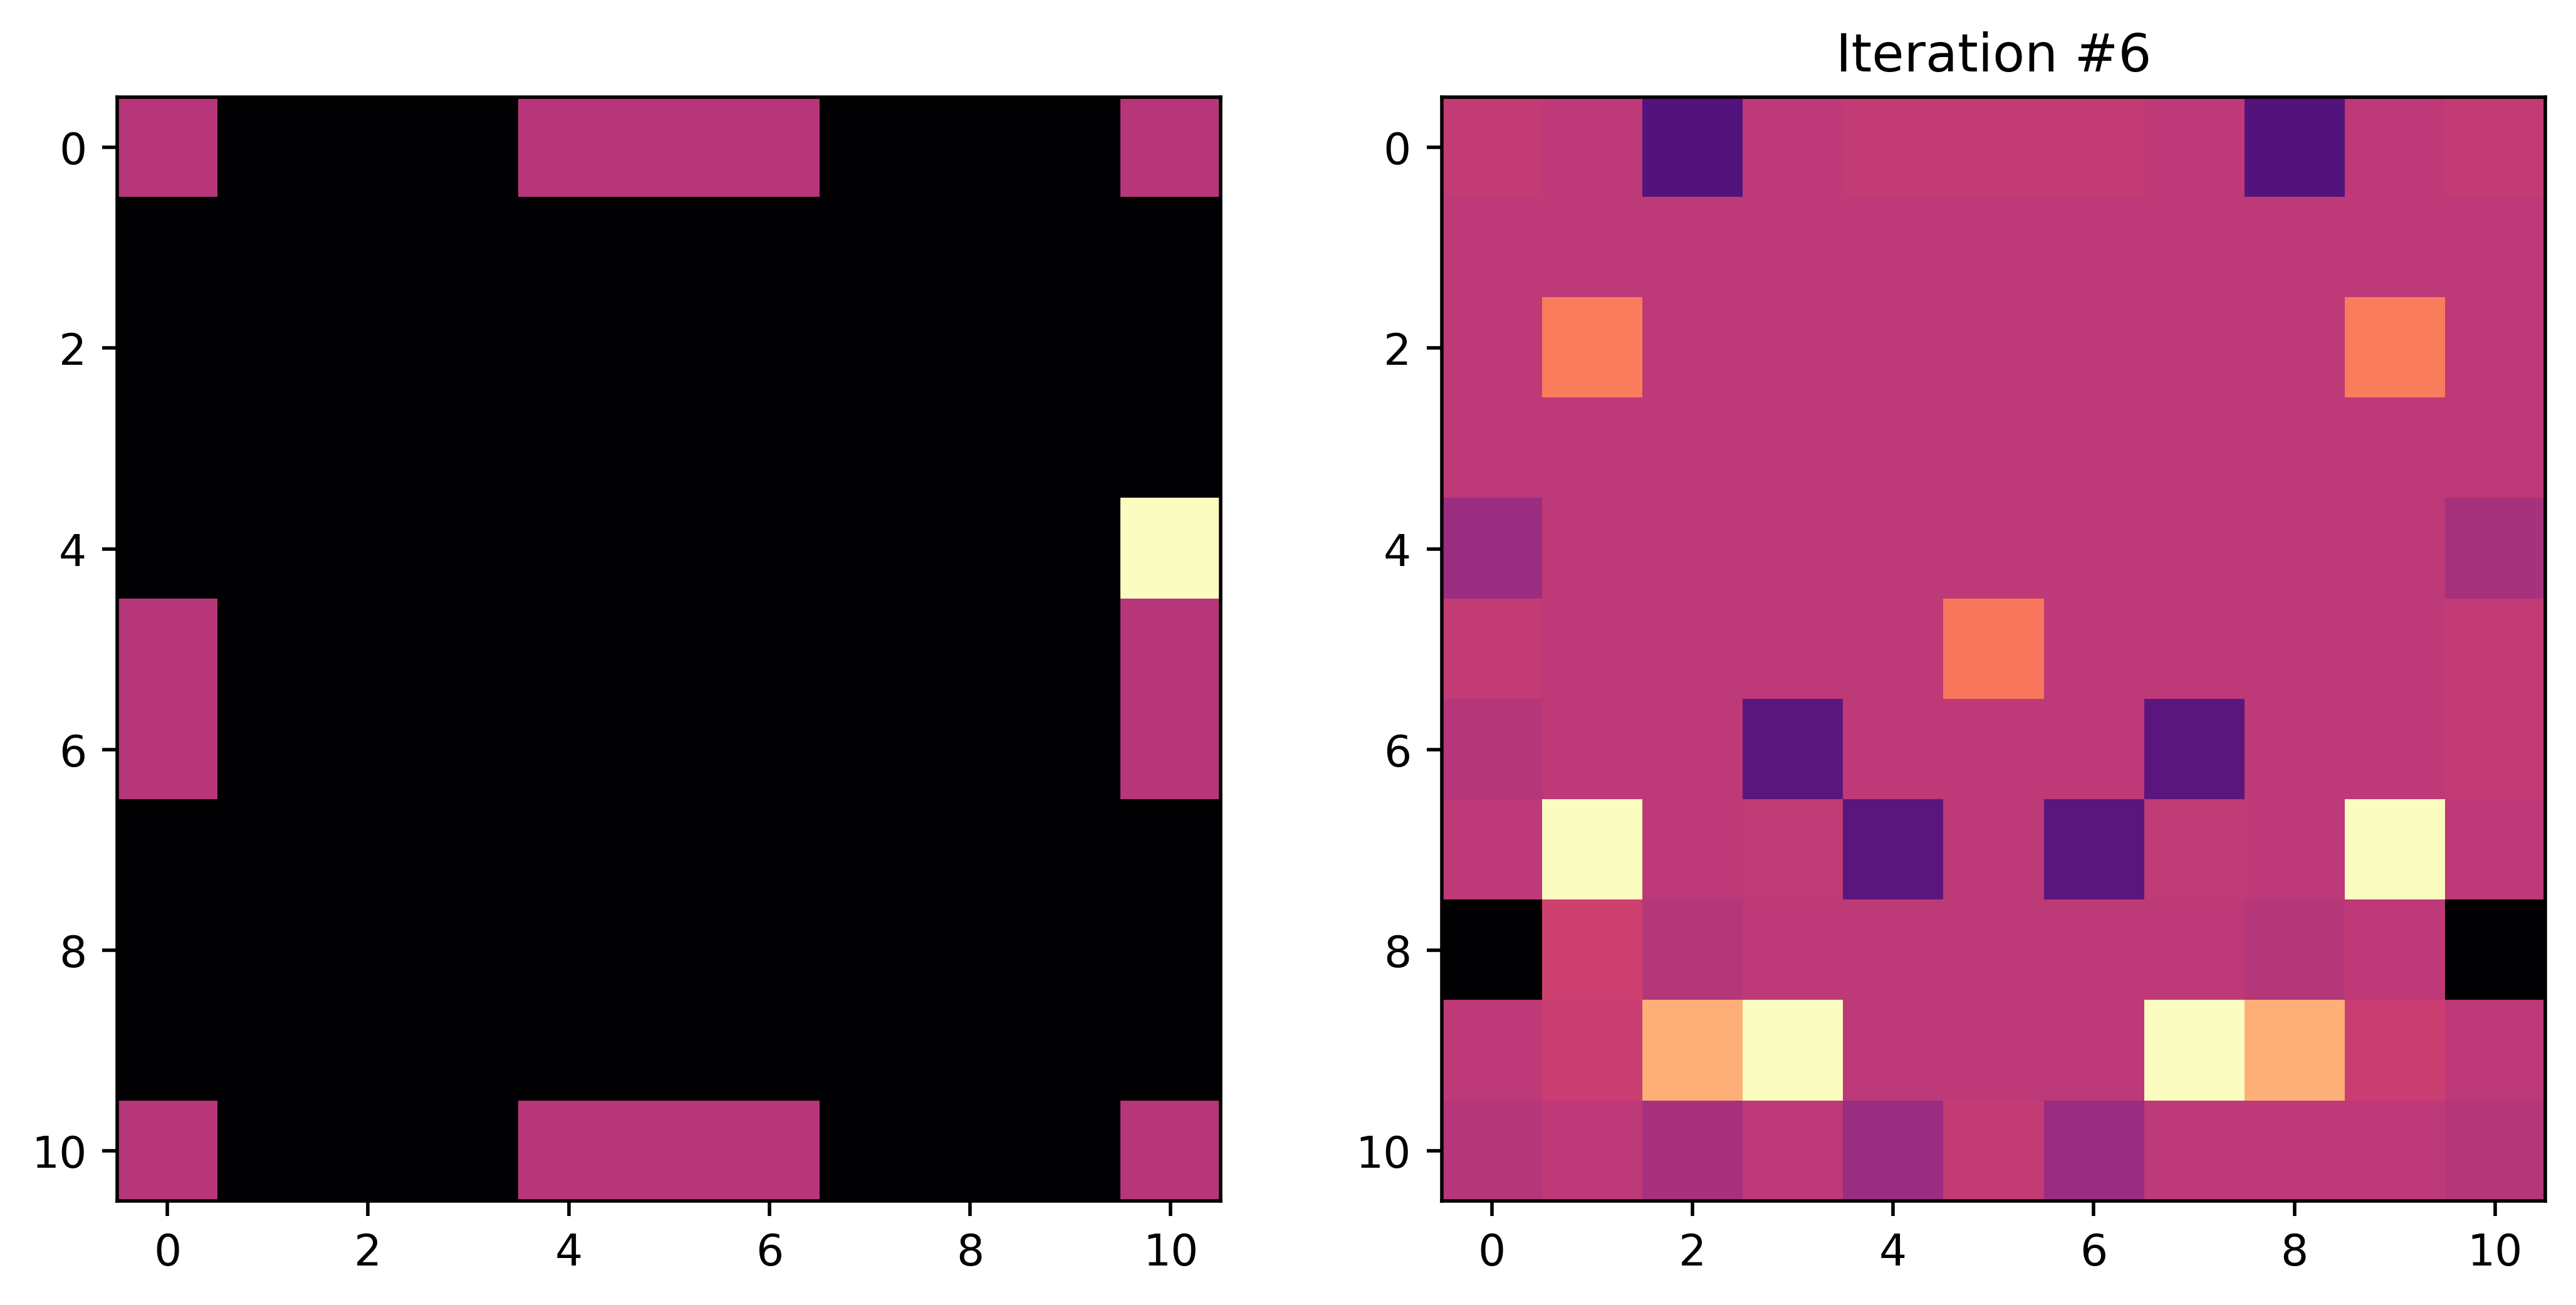

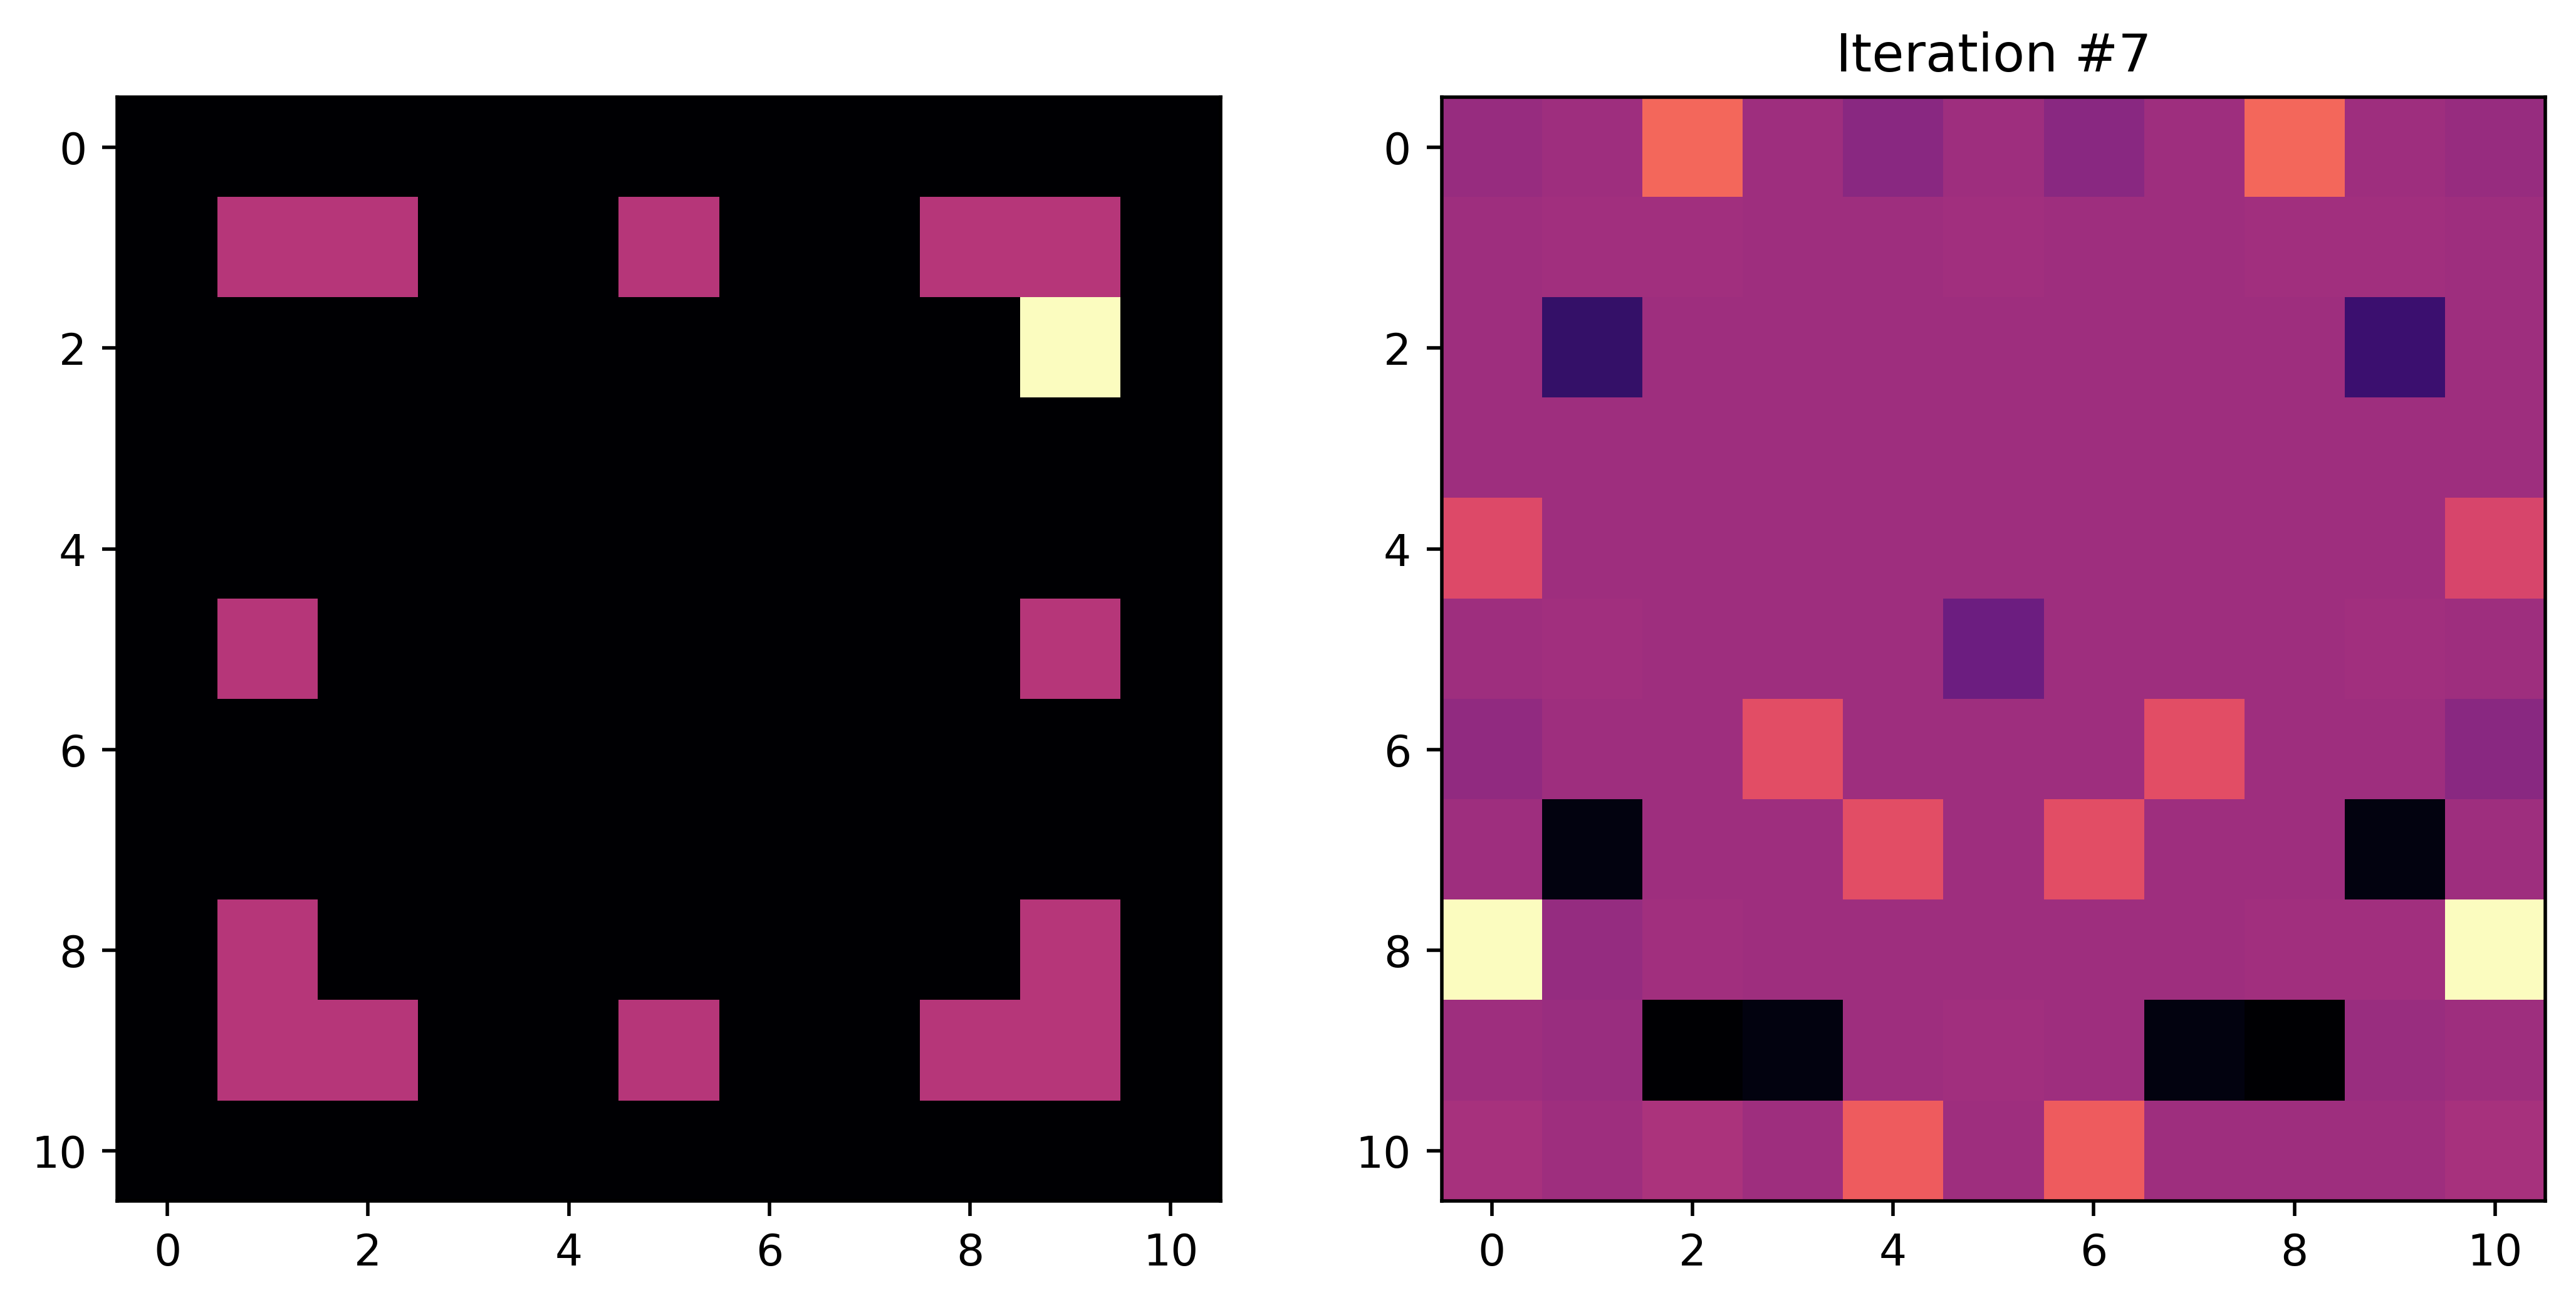

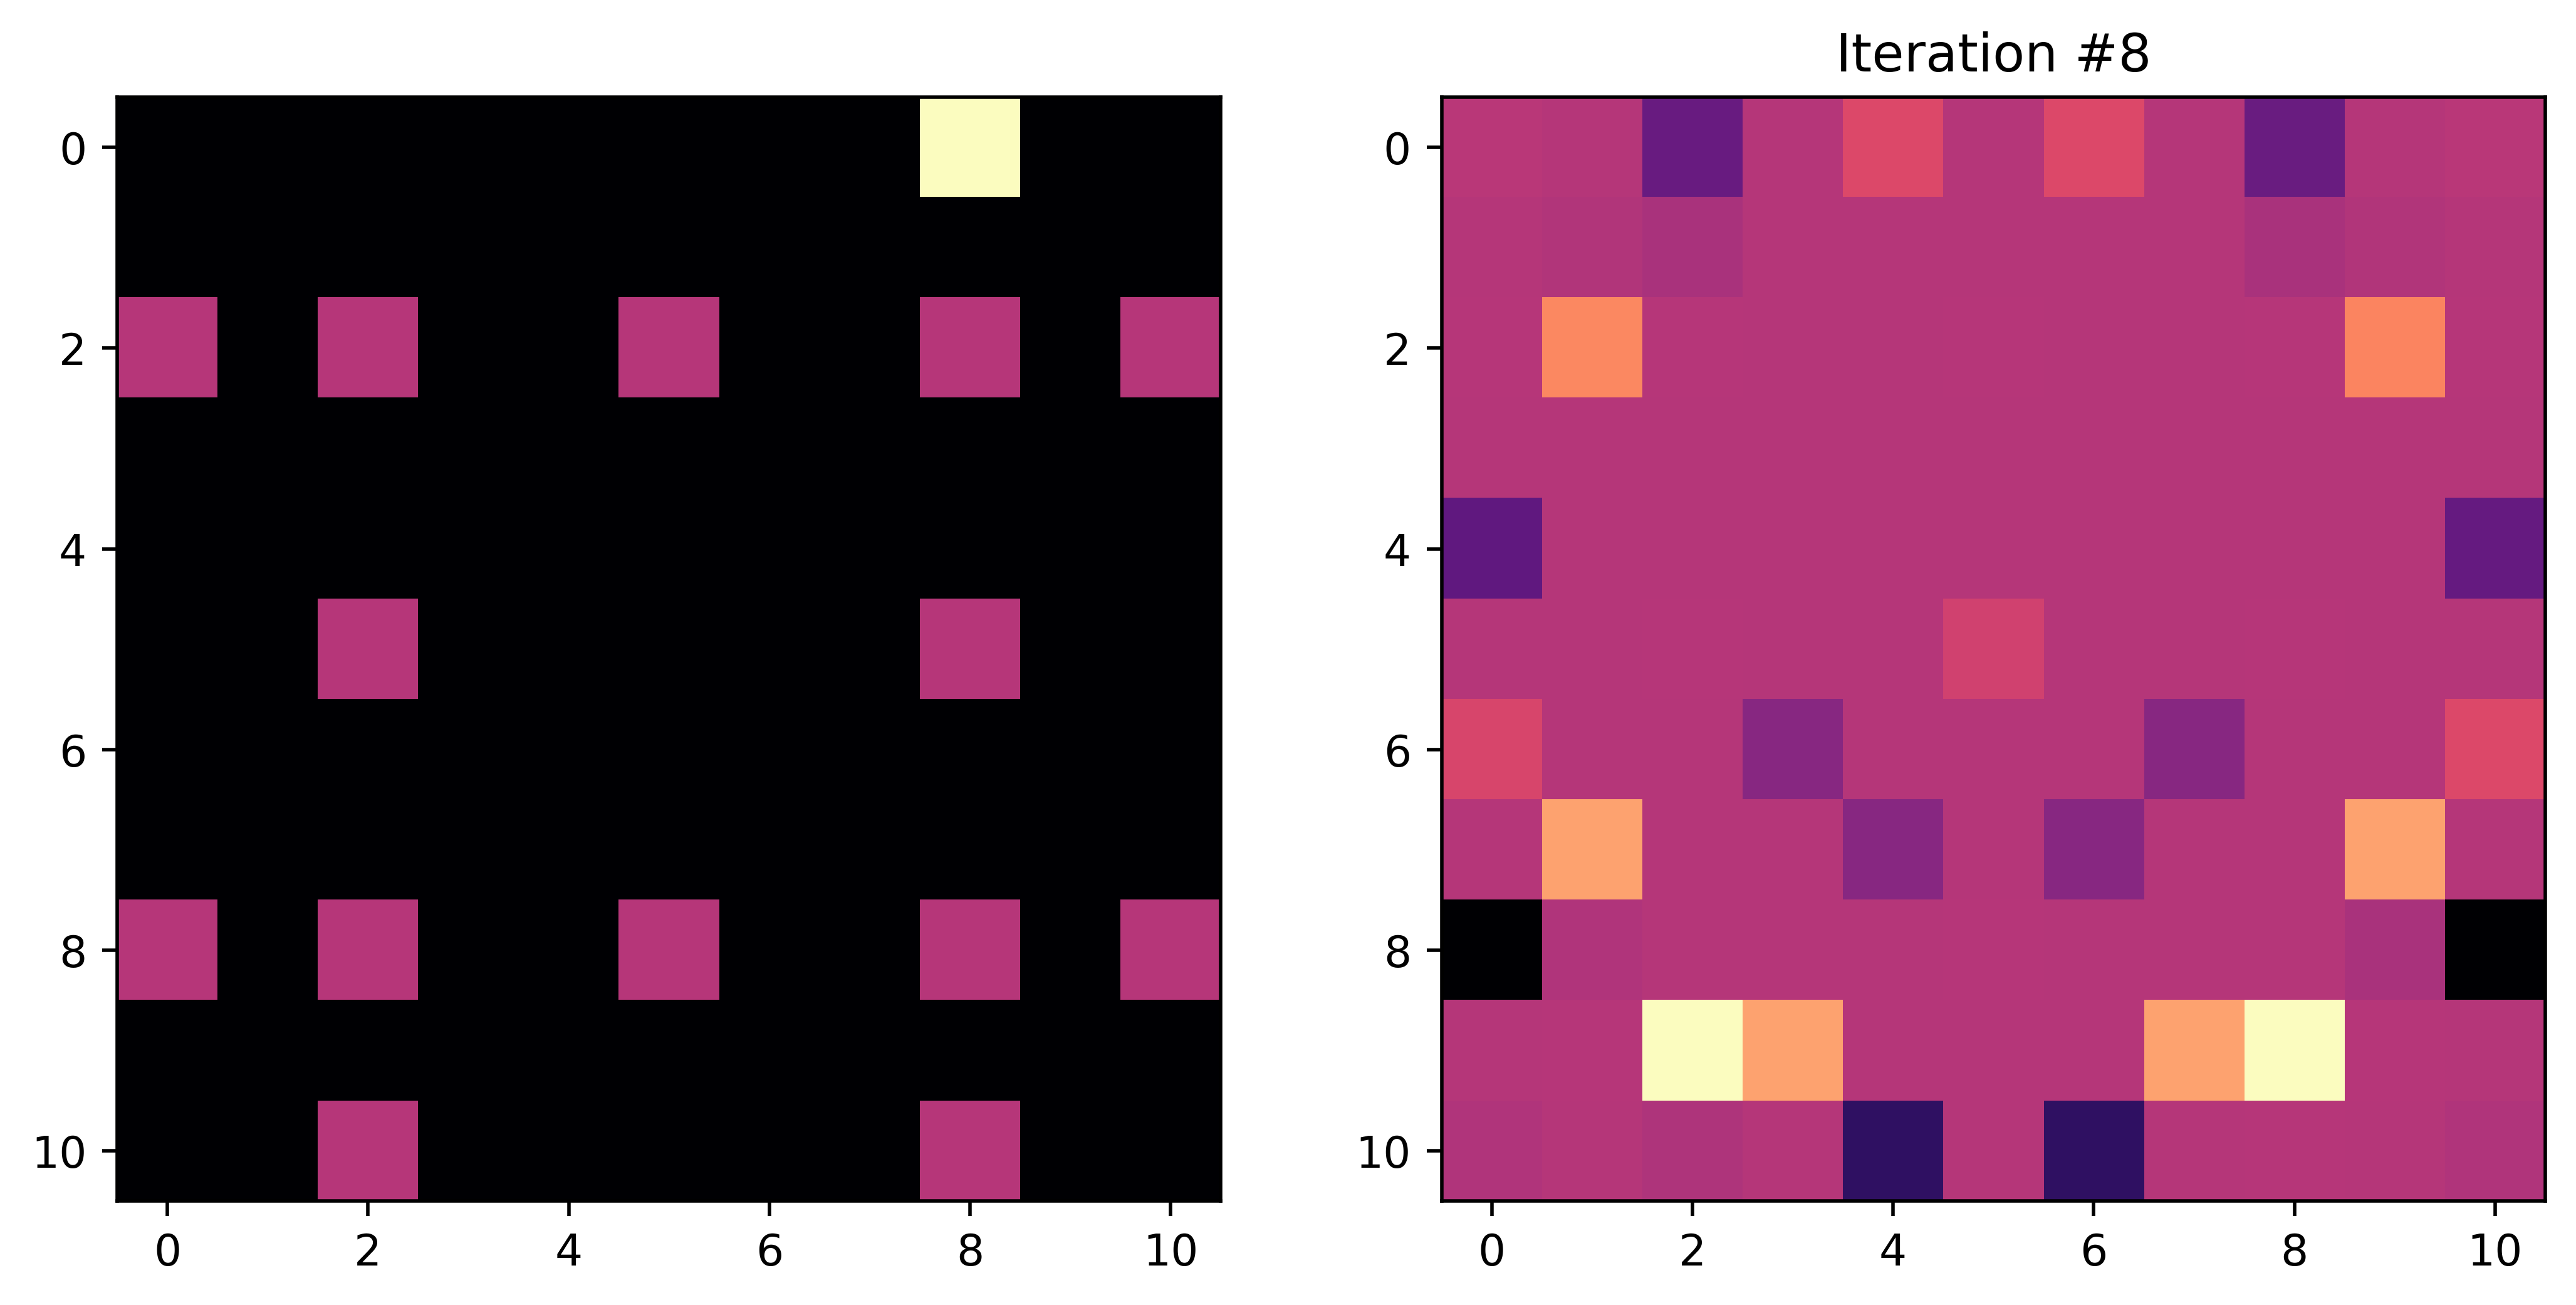

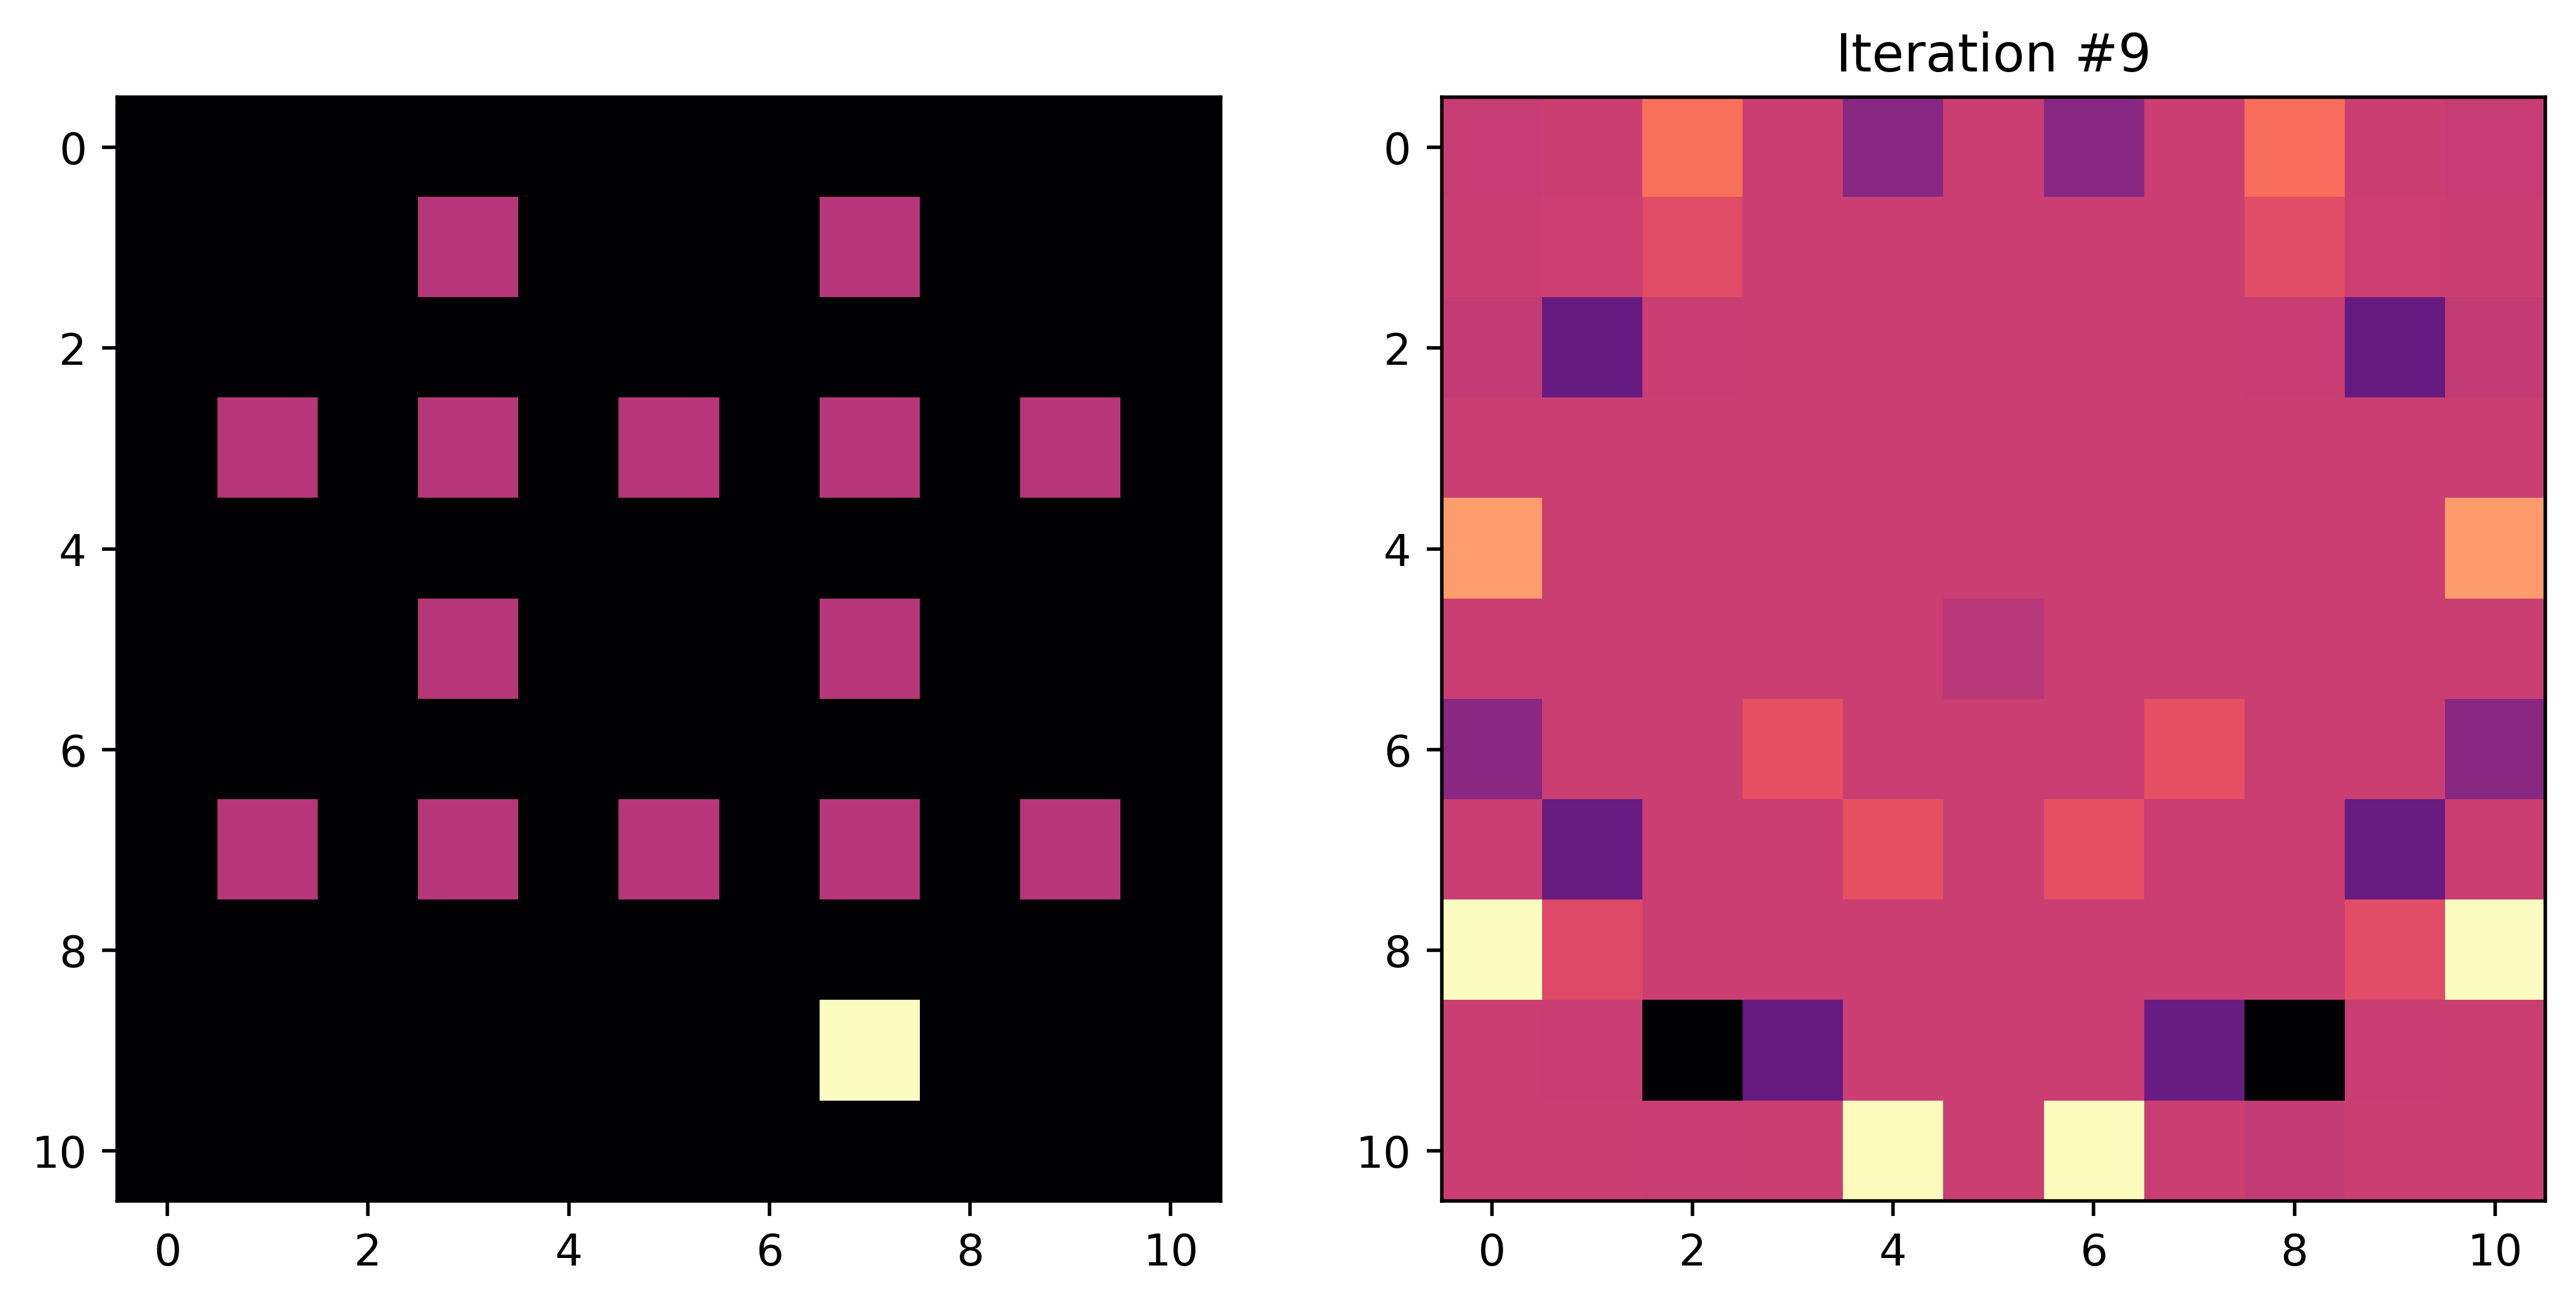

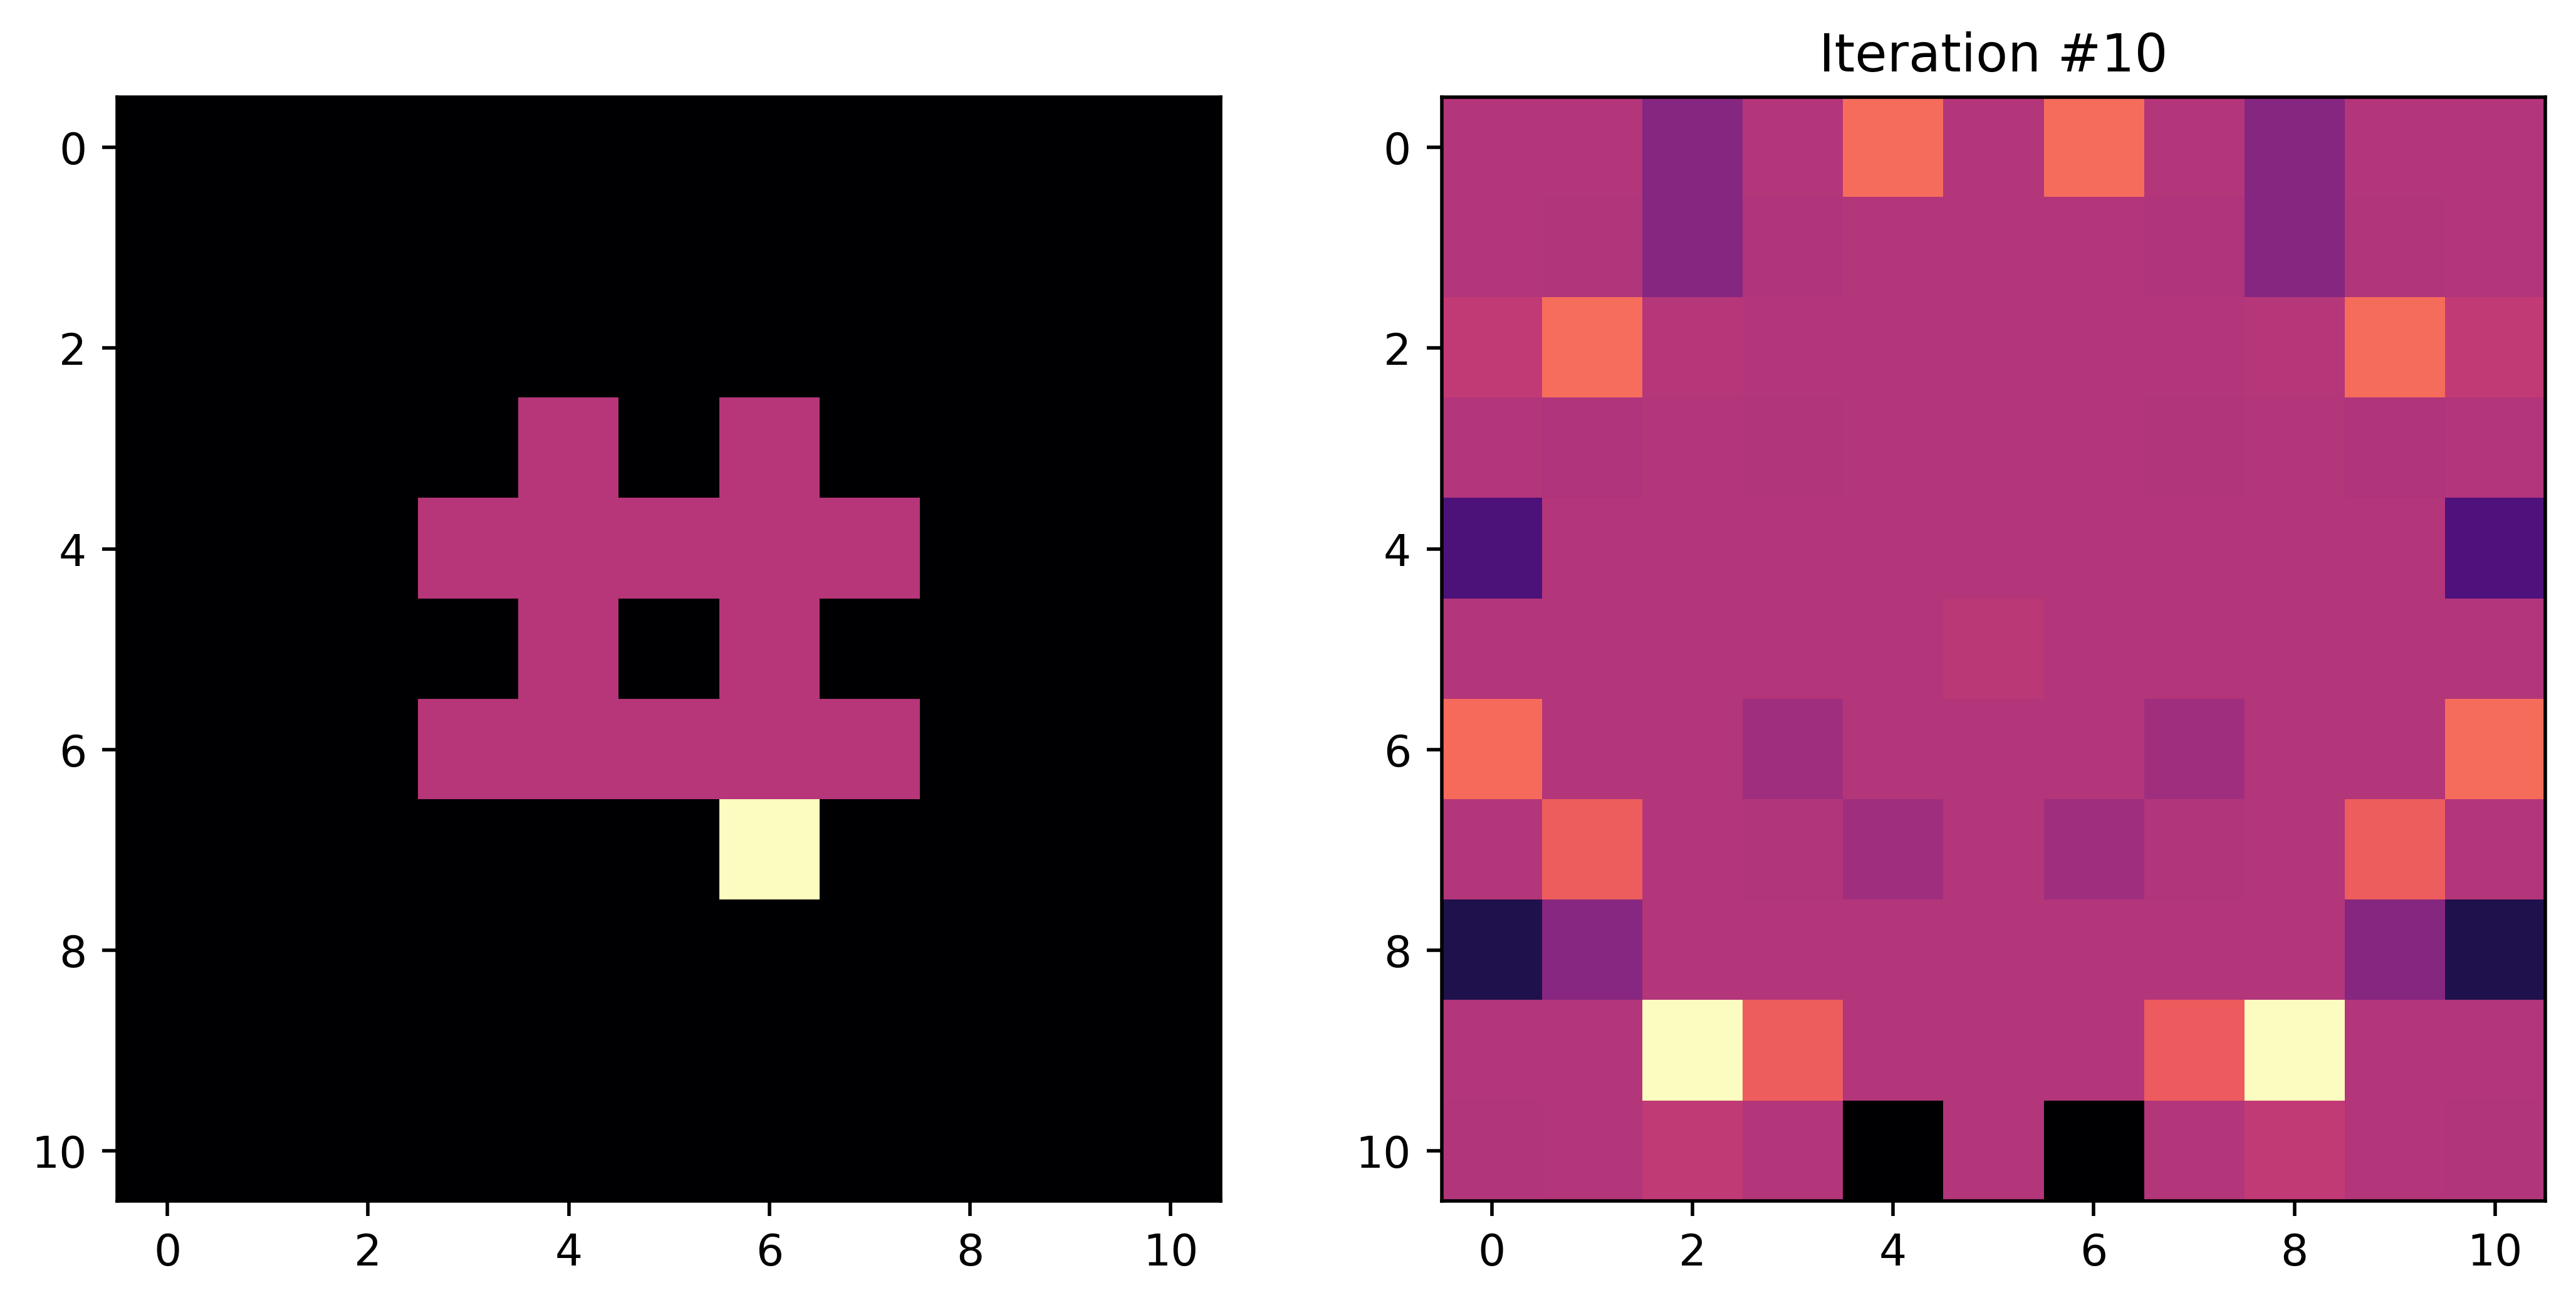

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.48676780e-05 1.48676780e-05 0.00000000e+00 0.00000000e+00
 8.32575361e-01 8.32575361e-01 8.32575361e-01 8.32575361e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [11]:
n_it = 10 # NX * NY

x_list = []
x_roll_list = []
x_custom_list = []
x_diff_list = []

# Generate random array and save to list
# x0 = np.random.rand(NY, NX, NL)

# src_val = [0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0]
src_val = [0.1] * NL

x0 = np.zeros((NY, NX, NL))
x0[NY//2, NX//2] = src_val

x_list.append(x0)
x_roll_list.append(x0)
x_custom_list.append(x0)

fig, ax = plt.subplots(1, 2, figsize=(10, 10), dpi=500)
ax[0].imshow(np.sum(x_roll_list[-1], axis=2), cmap="magma")
ax[1].imshow(np.sum(x_custom_list[-1], axis=2), cmap="magma")
plt.title(f"Iteration #0")
plt.show()

for it in range(n_it):
    # Perform streaming using using np.roll and save to list
    x = x_roll_list[-1]
    x0[NY//2, NX//2, :] = src_val
    x_roll = stream_roll(x)
    x_roll_list.append(x_roll)

    # Perform streaming using custom method and save to list
    x = x_custom_list[-1]
    x0[NY//2, NX//2, :] = src_val
    x_custom = stream_custom(x)
    x_custom_list.append(x_custom)

    # Calculate difference between results and save to list
    x_diff_list.append(x_custom - x_roll)

    # Plot results
    fig, ax = plt.subplots(1, 2, figsize=(10, 10), dpi=500)
    ax[0].imshow(np.sum(x_roll_list[-1], axis=2), cmap="magma")
    ax[1].imshow(np.sum(x_custom_list[-1], axis=2), cmap="magma")
    plt.title(f"Iteration #{it+1}")
    plt.show()

xp, yp = NX//2, NY//2
print(x_list[-1][xp, yp])
print(x_roll_list[-1][xp, yp])
print(x_custom_list[-1][xp, yp])

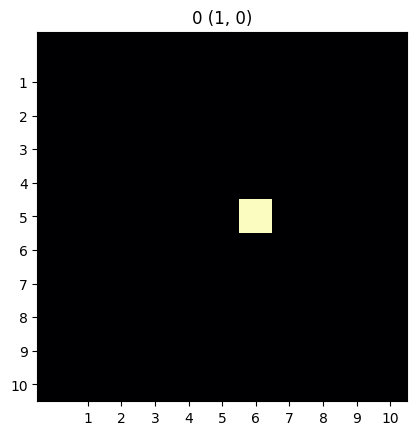

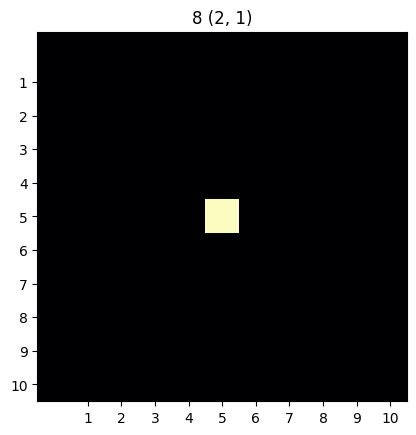

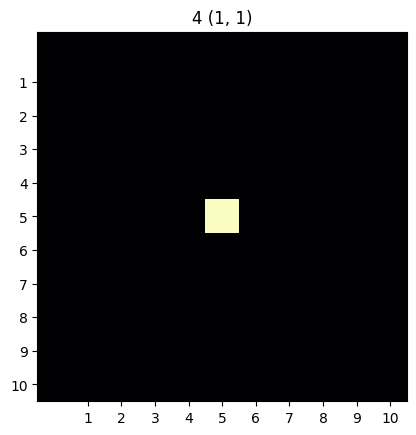

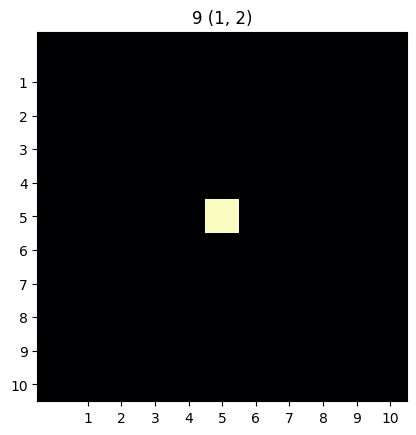

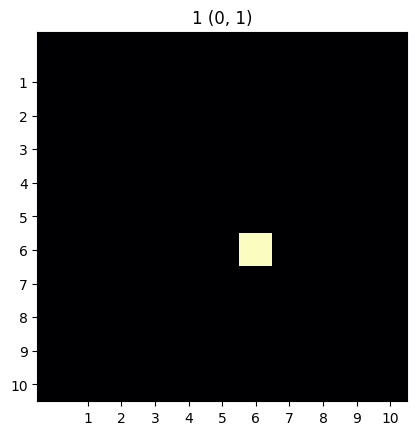

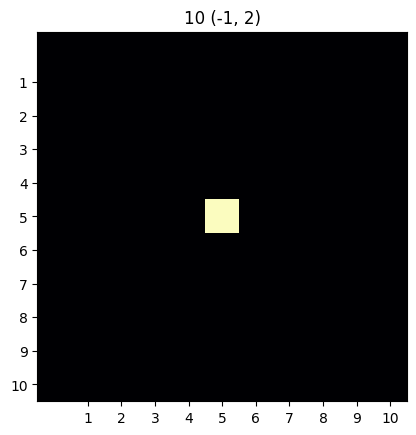

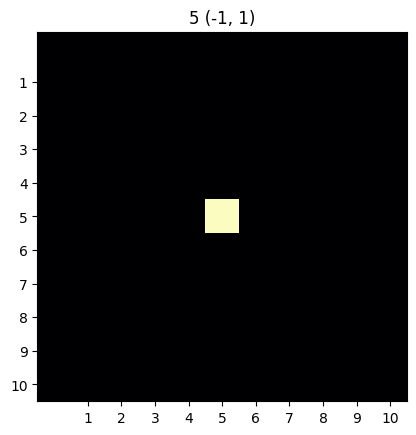

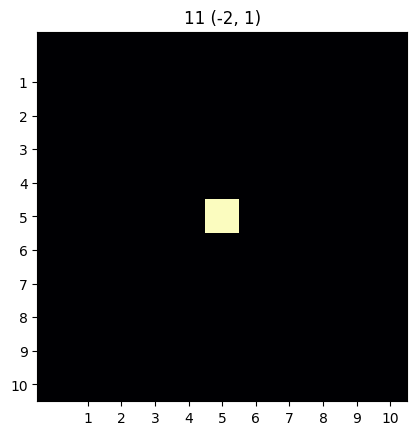

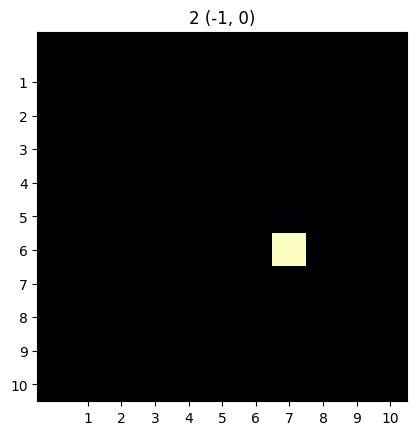

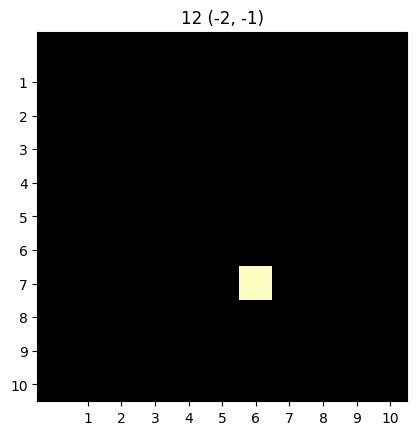

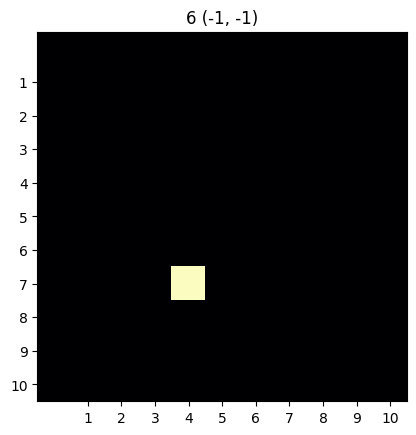

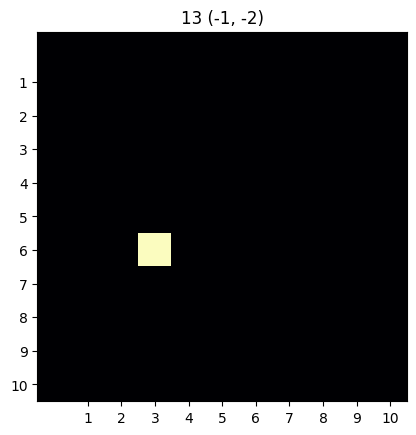

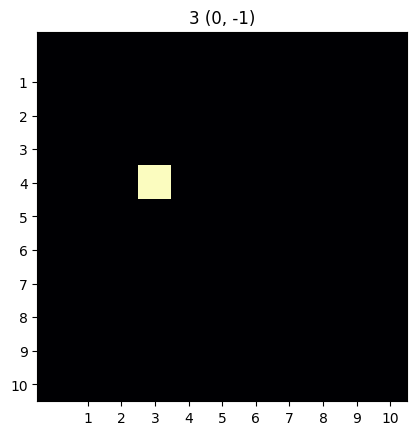

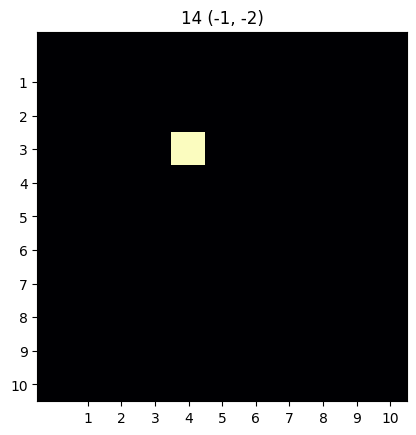

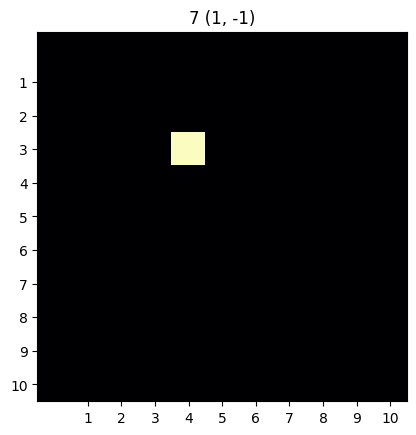

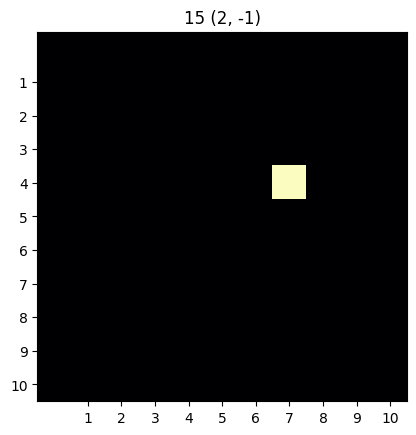

In [12]:
xf = x_list[0]

for dir_i, i_dir in enumerate(idxs_dir):
    cy = cys[i_dir]
    cx = cxs[i_dir]
    
    xf[:, :, i_dir] = np.roll(xf[:, :, i_dir], cx, axis=1)
    xf[:, :, i_dir] = np.roll(xf[:, :, i_dir], cy, axis=0)
    
    fig, ax = plt.subplots()
    plt.imshow(xf[:, :, dir_i], cmap="magma")
    plt.title(f"{i_dir} ({cx}, {cy})")
    ax.set_xticks(list(range(1, 11)))
    ax.set_yticks(list(range(1, 11)))